### Graham Kerr
#### graham.s.kerr@NASA.gov; kerrg@cua.edu

<H1 font size="+3" style="color:red">
SPICE (HSR)<br>
-- Summary of SPICE Flare Data
</H1>

In [50]:
##
## Import some modules
##


## The first path points to the location of utils.py... you don't need this for the 
## notebook to run, just comment out if you don't have a copy.
## The second path points to the location of SPICE_anal.py
import sys
sys.path.insert(0,'/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/MiscCodes/')
import utils
sys.path.insert(0,'/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/')
import SPICE_anal
# sys.path.insert(0,'/Users/gskerr1/Documents/Research/Python_Programs/sospice/sospice/')
# import sospice
# from sospice import Release
# from sospice import Catalog
# from sospice import FileMetadata
from sospice import spice_error
# import sunraster
from sunraster.instr.spice import read_spice_l2_fits

import astropy.units as u
from astropy.io import fits
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import wcs_to_celestial_frame
from astropy.nddata import NDUncertainty

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm, LogNorm as PowerNorm, LogNorm
from matplotlib.patches import Rectangle
import cmocean
import palettable as pal 

import copy

***Set up plot properties***
> - just loads my personal prefs, comment out if you don't have my utils.py

In [2]:
plot_dict = utils.plotsetup_image(font_size = 18)
plt.rcParams.update(plot_dict)

---
---
---
### <b style="color:blue"> Gather the data </b>

In [3]:
file_name =['/Volumes/GrahamKerr_work/spice_data/2024/03/23/solo_L2_spice-n-sit_20240323T234113_V02_251658348-013.fits'
            ]

In [4]:
raster = read_spice_l2_fits(file_name)

winds = SPICE_anal.print_windows(raster, verbose = True)

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
2024-05-09 14:45:36 - astropy - WARNING: FITSFixedWarning: CROTA = -0.313148996795 / [deg] S/C counter-clockwise roll rel to Solar N
keyword looks very much like CROTAn but isn't.
Set MJD-OBS to 60392.986959 from DATE-OBS.
Set MJD-BEG to 60392.986959 from DATE-BEG.
Set MJD-AVG to 60392.988848 from DATE-AVG.
Set MJD-END to 60392.990734 from DATE-END'. [astropy.wcs.wcs]
2024-05-09 14:45:36 - astropy - WARNING: FITSFixedWarning: 'datfix' made the change 'Set MJDREF to 60392.986959 from DATEREF.
Set MJD-OBS to 60392.986959 from DATE-OBS.
Set MJD-BEG to 60392.986959 from DATE-BEG.
Set MJD-AVG to 60392.988848 from DATE-AVG.
Set MJD-END to 60392.990734 from DATE-END'.
2024-05-09 14:45:36 - astropy - WARNING: UnitsWarning: 'W/m2/sr/nm' contains multiple slashes, which is discouraged by the FITS standard


['O III 703 / Mg IX 706 (Merged)', 'Fe XX 721 + O II (Merged)', 'N IV 765 - Peak', 'Ne VIII 770 - Peak', 'Ly-g-CIII group (Merged)', 'Ly beta blue continuum (Merged)', 'Ly Beta 1025 (Merged)', 'O VI 1032 (Merged)', 'O VI 1037 (Merged)']


In [5]:
wind_oiii = 'O III 703 / Mg IX 706 (Merged)'
window_oiii = raster[wind_oiii]

wind_fexx = 'Fe XX 721 + O II (Merged)'
window_fexx = raster[wind_fexx]

wind_niv = 'N IV 765 - Peak'
window_niv = raster[wind_niv]

wind_neviii = 'Ne VIII 770 - Peak'
window_neviii = raster[wind_neviii]

wind_lyg = 'Ly-g-CIII group (Merged)'
window_lyg = raster[wind_lyg]

wind_lyb_cont = 'Ly beta blue continuum (Merged)'
window_lyb_cont = raster[wind_lyb_cont]

wind_lyb = 'Ly Beta 1025 (Merged)'
window_lyb = raster[wind_lyb]

wind_ovi_1032 = 'O VI 1032 (Merged)'
window_ovi_1032 = raster[wind_ovi_1032]

wind_ovi_1037 = 'O VI 1037 (Merged)'
window_ovi_1037 = raster[wind_ovi_1037]

***Add in the uncertainty***
> - The sunraster object has a field that can be populated by an astropy NDUncertainty object
> - Right now the propagate methods do nothing.

In [6]:
window_oiii = SPICE_anal.uncertaintyL2(window_oiii, verbose=False)
window_fexx = SPICE_anal.uncertaintyL2(window_fexx, verbose=False)
window_niv = SPICE_anal.uncertaintyL2(window_niv, verbose=False)
window_neviii = SPICE_anal.uncertaintyL2(window_neviii, verbose=False)
window_lyg = SPICE_anal.uncertaintyL2(window_lyg, verbose=False)
window_lyb_cont = SPICE_anal.uncertaintyL2(window_lyb_cont, verbose=False)
window_lyb = SPICE_anal.uncertaintyL2(window_lyb, verbose=False)
window_ovi_1032 = SPICE_anal.uncertaintyL2(window_ovi_1032, verbose=False)
window_ovi_1037 = SPICE_anal.uncertaintyL2(window_ovi_1037, verbose=False)

***Grab times and wavelengths***

In [7]:
t0 = window_lyb.meta['DATE-OBS']
print("t0 = ",t0)

t0 =  2024-03-23T23:41:13.293


In [8]:
wavels_oiii = SPICE_anal.grab_wavel(raster, winid = wind_oiii, verbose = False)
times_oiii = SPICE_anal.grab_time(raster,winid = wind_oiii, nounit = False, verbose = False)

wavels_fexx = SPICE_anal.grab_wavel(raster, winid = wind_fexx, verbose = False)
times_fexx = SPICE_anal.grab_time(raster,winid = wind_fexx, nounit = False, verbose = False)

wavels_niv = SPICE_anal.grab_wavel(raster, winid = wind_niv, verbose = False)
times_niv = SPICE_anal.grab_time(raster,winid = wind_niv, nounit = False, verbose = False)

wavels_neviii = SPICE_anal.grab_wavel(raster, winid = wind_neviii, verbose = False)
times_neviii = SPICE_anal.grab_time(raster,winid = wind_neviii, nounit = False, verbose = False)

wavels_lyg = SPICE_anal.grab_wavel(raster, winid = wind_lyg, verbose = False)
times_lyg = SPICE_anal.grab_time(raster,winid = wind_lyg, nounit = False, verbose = False)

wavels_lyb_cont = SPICE_anal.grab_wavel(raster, winid = wind_lyb_cont, verbose = False)
times_lyb_cont = SPICE_anal.grab_time(raster,winid = wind_lyb_cont, nounit = False, verbose = False)

wavels_lyb = SPICE_anal.grab_wavel(raster, winid = wind_lyb, verbose = False)
times_lyb = SPICE_anal.grab_time(raster,winid = wind_lyb, nounit = False, verbose = False)

wavels_ovi_1032 = SPICE_anal.grab_wavel(raster, winid = wind_ovi_1032, verbose = False)
times_ovi_1032 = SPICE_anal.grab_time(raster,winid = wind_ovi_1032, nounit = False, verbose = False)

wavels_ovi_1037 = SPICE_anal.grab_wavel(raster, winid = wind_ovi_1037, verbose = False)
times_ovi_1037 = SPICE_anal.grab_time(raster,winid = wind_ovi_1037, nounit = False, verbose = False)

---
---
---
### <b style="color:blue"> Plot Example Spectra </b>
> - We know when the flare is, so lets look at that time to grab wavelength ranges

In [9]:
times_lyb_cont[27]

<Quantity 140.10027 s>

140.10027000000002 s


2024-05-09 14:45:43 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


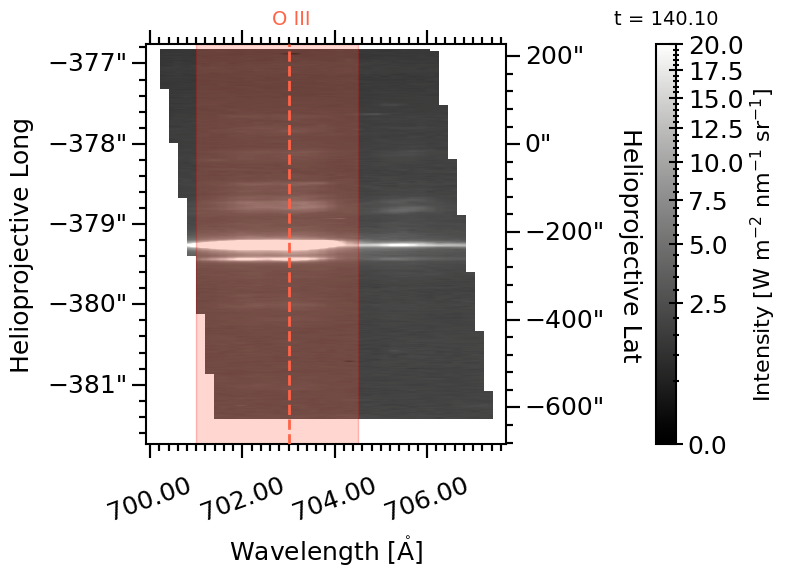

In [10]:
### Here we select a time in the flare to see how much the line is broadened
ind = 27
print(times_oiii[ind])

savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/'
fname_out = 'SPICE_Spectrogram_23rdMarch2024_V02_251658348-013_OIII'

## Make a slice of just the x-position and spectral-position
ndslice_exp_oiii = window_oiii[ind,:,:,0]

## In this we invert the x and y axes to have wavelength along the bottom.
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_exp_oiii.wcs,slices=('y', 'x'))

## Put a '1' at the start to have no normalisation
norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=20)
im = ax.imshow(ndslice_exp_oiii.data.transpose(), 
               norm = norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.gray)

## Guess of rest-ish wavelengths of the two lines of interest in this window
rest_oiii = 70.3

## The pixel numbers for those wavelengths
pix_oiii = SPICE_anal.wavel2pix(ndslice_exp_oiii, rest_oiii, outputall=False, verbose=False)

ax.axvline(x=pix_oiii, linestyle = '--', linewidth = 2, color = 'tomato')

## Some formatting and conversion of wavelength axis
ax.coords[2].set_ticklabel(exclude_overlapping=True)
ax.coords[2].set_format_unit(u.angstrom)
ax.coords[2].set_major_formatter('x.xx')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.coords[2].set_ticklabel(rotation=20, pad=30)

## Some formatting of spatial axes
ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.tick_params(axis='both', which='both', direction='out')

# The wavelengths that define the extent of the line(s)
w1_oiii = rest_oiii-.2
w2_oiii = rest_oiii+.15
wlimpix_oiii = SPICE_anal.wavel2pix(ndslice_exp_oiii, [w1_oiii,w2_oiii], outputall=False, verbose=False)
r_oiii = Rectangle((wlimpix_oiii[0], 0), wlimpix_oiii[1]-wlimpix_oiii[0], ndslice_exp_oiii.data.shape[1], 
                   edgecolor='red', facecolor='tomato', alpha = 0.25)
ax.add_patch(r_oiii)

ax.text(0.35, 1.05, r'O III', 
         color = 'tomato',transform=ax.transAxes, fontsize = 14) 
ax.text(1.3, 1.05, 't = %0.2f' %(times_oiii[ind].value), 
         color = 'black',transform=ax.transAxes, fontsize = 14) 

cbar = plt.colorbar(im, pad=0.25)
cbar.set_label('Intensity [W m$^{-2}$ nm$^{-1}$ sr$^{-1}$]', size=16)


if savepng == True:
    plt.savefig(dirout+fname_out+'_%04d.png' %(ind), format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'_%04d.pdf' %(ind), format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()


140.10027000000002 s


2024-05-09 14:45:51 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


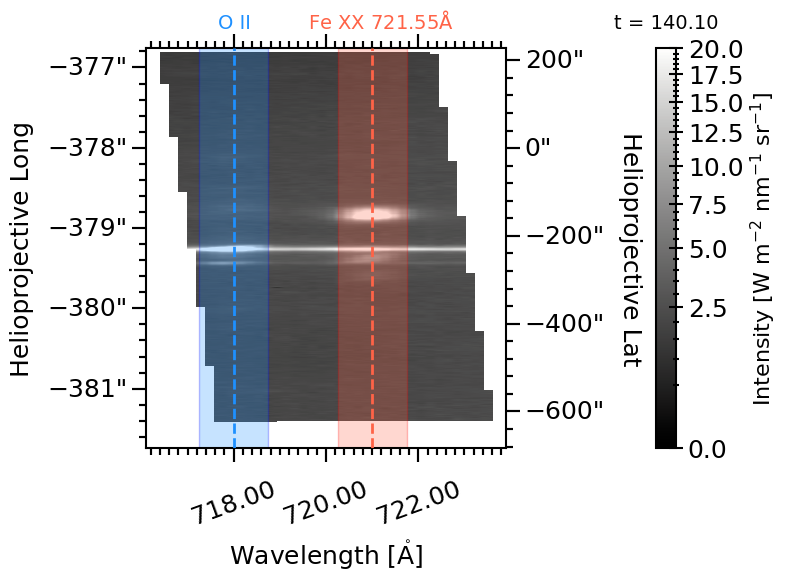

In [11]:
### Here we select a time in the flare to see how much the line is broadened
ind = 27
print(times_fexx[ind])

savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/'
fname_out = 'SPICE_Spectrogram_23rdMarch2024_V02_251658348-013_FeXX'

## Make a slice of just the x-position and spectral-position
ndslice_exp_fexx = window_fexx[ind,:,:,0]

## In this we invert the x and y axes to have wavelength along the bottom.
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_exp_fexx.wcs,slices=('y', 'x'))

## Put a '1' at the start to have no normalisation
norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=20)
im = ax.imshow(ndslice_exp_fexx.data.transpose(), 
               norm = norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.gray)

## Guess of rest-ish wavelengths of the two lines of interest in this window
rest_fexx = 72.1
rest_oii = 71.80
## The pixel numbers for those wavelengths
pix_fexx = SPICE_anal.wavel2pix(ndslice_exp_fexx, rest_fexx, outputall=False, verbose=False)
pix_oii = SPICE_anal.wavel2pix(ndslice_exp_fexx, rest_oii, outputall=False, verbose=False)

ax.axvline(x=pix_fexx, linestyle = '--', linewidth = 2, color = 'tomato')
ax.axvline(x=pix_oii, linestyle = '--', linewidth = 2, color = 'dodgerblue')

## Some formatting and conversion of wavelength axis
ax.coords[2].set_ticklabel(exclude_overlapping=True)
ax.coords[2].set_format_unit(u.angstrom)
ax.coords[2].set_major_formatter('x.xx')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.coords[2].set_ticklabel(rotation=20, pad=30)

## Some formatting of spatial axes
ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.tick_params(axis='both', which='both', direction='out')

# The wavelengths that define the extent of the line(s)
w1_fexx = rest_fexx-.075
w2_fexx = rest_fexx+.075
wlimpix_fexx = SPICE_anal.wavel2pix(ndslice_exp_fexx, [w1_fexx,w2_fexx], outputall=False, verbose=False)
r_fexx = Rectangle((wlimpix_fexx[0], 0), wlimpix_fexx[1]-wlimpix_fexx[0], ndslice_exp_fexx.data.shape[1], 
                   edgecolor='red', facecolor='tomato', alpha = 0.25)
ax.add_patch(r_fexx)

w1_oii = rest_oii-.075
w2_oii = rest_oii+.075
wlimpix_oii = SPICE_anal.wavel2pix(ndslice_exp_fexx, [w1_oii,w2_oii], outputall=False, verbose=False)
r_oii = Rectangle((wlimpix_oii[0], 0), wlimpix_oii[1]-wlimpix_oii[0], ndslice_exp_fexx.data.shape[1], 
                   edgecolor='blue', facecolor='dodgerblue', alpha = 0.25)
ax.add_patch(r_oii)

ax.text(0.45, 1.05, r'Fe XX 721.55$\mathrm{\AA}$', 
         color = 'tomato',transform=ax.transAxes, fontsize = 14) 
ax.text(0.2, 1.05, r'O II ', 
         color = 'dodgerblue',transform=ax.transAxes, fontsize = 14) 
ax.text(1.3, 1.05, 't = %0.2f' %(times_oiii[ind].value), 
         color = 'black',transform=ax.transAxes, fontsize = 14) 

cbar = plt.colorbar(im, pad=0.25)
cbar.set_label('Intensity [W m$^{-2}$ nm$^{-1}$ sr$^{-1}$]', size=16)

if savepng == True:
    plt.savefig(dirout+fname_out+'_%04d.png' %(ind), format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'_%04d.pdf' %(ind), format='pdf', bbox_inches = 'tight', dpi=300)

plt.show()

140.10027000000002 s


2024-05-09 14:45:57 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


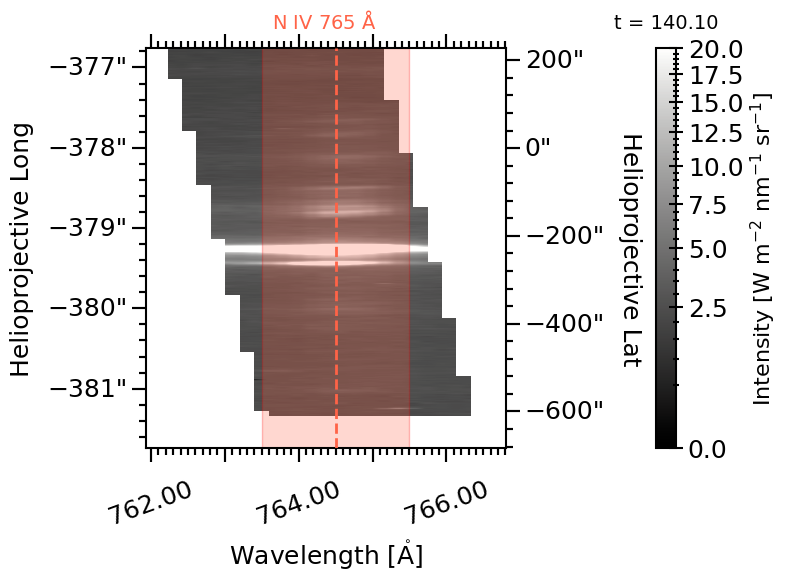

In [12]:
### Here we select a time in the flare to see how much the line is broadened
ind = 27
print(times_niv[ind])

savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spectrogram_23rdMarch2024_V02_251658348-013_NIV'

## Make a slice of just the x-position and spectral-position
ndslice_exp_niv = window_niv[ind,:,:,0]

## In this we invert the x and y axes to have wavelength along the bottom.
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_exp_niv.wcs,slices=('y', 'x'))

## Put a '1' at the start to have no normalisation
norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=20)
im = ax.imshow(ndslice_exp_niv.data.transpose(), 
               norm = norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.gray)

## Guess of rest-ish wavelengths of the two lines of interest in this window
rest_niv = 76.45

## The pixel numbers for those wavelengths
pix_niv = SPICE_anal.wavel2pix(ndslice_exp_niv, rest_niv, outputall=False, verbose=False)

ax.axvline(x=pix_niv, linestyle = '--', linewidth = 2, color = 'tomato')

## Some formatting and conversion of wavelength axis
ax.coords[2].set_ticklabel(exclude_overlapping=True)
ax.coords[2].set_format_unit(u.angstrom)
ax.coords[2].set_major_formatter('x.xx')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.coords[2].set_ticklabel(rotation=20, pad=30)

## Some formatting of spatial axes
ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.tick_params(axis='both', which='both', direction='out')

# The wavelengths that define the extent of the line(s)
w1_niv = rest_niv-.1
w2_niv = rest_niv+.1
wlimpix_niv = SPICE_anal.wavel2pix(ndslice_exp_niv, [w1_niv,w2_niv], outputall=False, verbose=False)
r_niv = Rectangle((wlimpix_niv[0], 0), wlimpix_niv[1]-wlimpix_niv[0], ndslice_exp_niv.data.shape[1], 
                   edgecolor='red', facecolor='tomato', alpha = 0.25)
ax.add_patch(r_niv)

ax.text(0.35, 1.05, r'N IV 765 $\mathrm{\AA}$', 
         color = 'tomato',transform=ax.transAxes, fontsize = 14) 
ax.text(1.3, 1.05, 't = %0.2f' %(times_oiii[ind].value), 
         color = 'black',transform=ax.transAxes, fontsize = 14) 

cbar = plt.colorbar(im, pad=0.25)
cbar.set_label('Intensity [W m$^{-2}$ nm$^{-1}$ sr$^{-1}$]', size=16)

if savepng == True:
    plt.savefig(dirout+fname_out+'_%04d.png' %(ind), format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'_%04d.pdf' %(ind), format='pdf', bbox_inches = 'tight', dpi=300)

plt.show()

140.10027000000002 s


2024-05-09 14:46:04 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


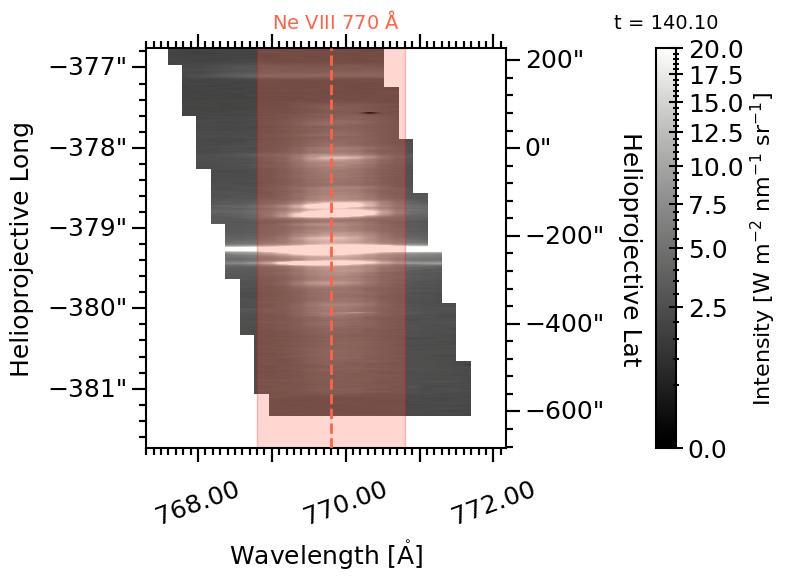

In [13]:
### Here we select a time in the flare to see how much the line is broadened
ind = 27
print(times_neviii[ind])

savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spectrogram_23rdMarch2024_V02_251658348-013_NeVIII'

## Make a slice of just the x-position and spectral-position
ndslice_exp_neviii = window_neviii[ind,:,:,0]

## In this we invert the x and y axes to have wavelength along the bottom.
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_exp_neviii.wcs,slices=('y', 'x'))

## Put a '1' at the start to have no normalisation
norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=20)
im = ax.imshow(ndslice_exp_neviii.data.transpose(), 
               norm = norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.gray)

## Guess of rest-ish wavelengths of the two lines of interest in this window
rest_neviii = 76.98

## The pixel numbers for those wavelengths
pix_neviii = SPICE_anal.wavel2pix(ndslice_exp_neviii, rest_neviii, outputall=False, verbose=False)

ax.axvline(x=pix_neviii, linestyle = '--', linewidth = 2, color = 'tomato')

## Some formatting and conversion of wavelength axis
ax.coords[2].set_ticklabel(exclude_overlapping=True)
ax.coords[2].set_format_unit(u.angstrom)
ax.coords[2].set_major_formatter('x.xx')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.coords[2].set_ticklabel(rotation=20, pad=30)

## Some formatting of spatial axes
ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.tick_params(axis='both', which='both', direction='out')

# The wavelengths that define the extent of the line(s)
w1_neviii = rest_neviii-.1
w2_neviii = rest_neviii+.1
wlimpix_neviii = SPICE_anal.wavel2pix(ndslice_exp_neviii, [w1_neviii,w2_neviii], outputall=False, verbose=False)
r_neviii = Rectangle((wlimpix_neviii[0], 0), wlimpix_neviii[1]-wlimpix_neviii[0], ndslice_exp_neviii.data.shape[1], 
                   edgecolor='red', facecolor='tomato', alpha = 0.25)
ax.add_patch(r_neviii)

ax.text(0.35, 1.05, r'Ne VIII 770 $\mathrm{\AA}$', 
         color = 'tomato',transform=ax.transAxes, fontsize = 14) 
ax.text(1.3, 1.05, 't = %0.2f' %(times_oiii[ind].value), 
         color = 'black',transform=ax.transAxes, fontsize = 14) 

cbar = plt.colorbar(im, pad=0.25)
cbar.set_label('Intensity [W m$^{-2}$ nm$^{-1}$ sr$^{-1}$]', size=16)

if savepng == True:
    plt.savefig(dirout+fname_out+'_%04d.png' %(ind), format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'_%04d.pdf' %(ind), format='pdf', bbox_inches = 'tight', dpi=300)

plt.show()

140.10027000000002 s


2024-05-09 14:46:11 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


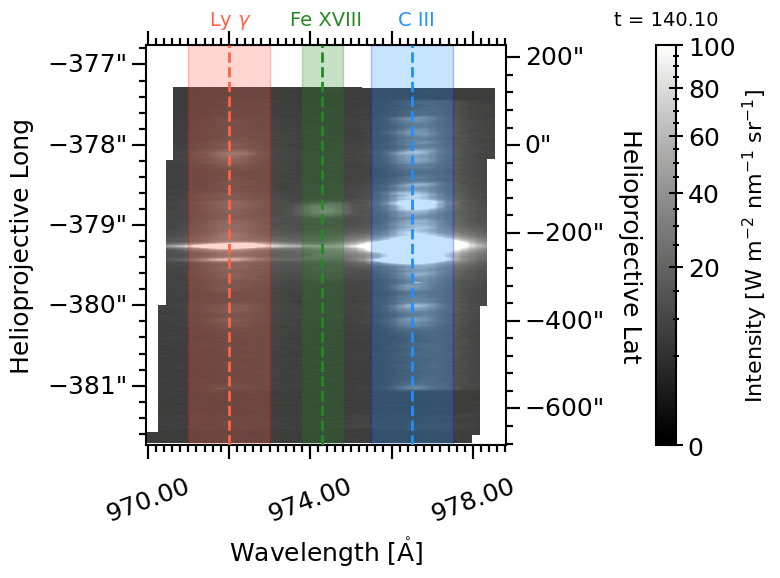

In [14]:
### Here we select a time in the flare to see how much the line is broadened
ind = 27
print(times_lyg[ind])

savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spectrogram_23rdMarch2024_V02_251658348-013_Lyg'

## Make a slice of just the x-position and spectral-position
ndslice_exp_lyg = window_lyg[ind,:,:,0]

## In this we invert the x and y axes to have wavelength along the bottom.
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_exp_lyg.wcs,slices=('y', 'x'))

## Put a '1' at the start to have no normalisation
norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=100)
im = ax.imshow(ndslice_exp_lyg.data.transpose(), 
               norm = norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.gray)

## Guess of rest-ish wavelengths of the two lines of interest in this window
rest_lyg = 97.2
rest_ciii = 97.65
rest_fexviii = 97.43

## The pixel numbers for those wavelengths
pix_lyg = SPICE_anal.wavel2pix(ndslice_exp_lyg, rest_lyg, outputall=False, verbose=False)
pix_ciii = SPICE_anal.wavel2pix(ndslice_exp_lyg, rest_ciii, outputall=False, verbose=False)
pix_fexviii = SPICE_anal.wavel2pix(ndslice_exp_lyg, rest_fexviii, outputall=False, verbose=False)

ax.axvline(x=pix_lyg, linestyle = '--', linewidth = 2, color = 'tomato')
ax.axvline(x=pix_ciii, linestyle = '--', linewidth = 2, color = 'dodgerblue')
ax.axvline(x=pix_fexviii, linestyle = '--', linewidth = 2, color = 'forestgreen')

## Some formatting and conversion of wavelength axis
ax.coords[2].set_ticklabel(exclude_overlapping=True)
ax.coords[2].set_format_unit(u.angstrom)
ax.coords[2].set_major_formatter('x.xx')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.coords[2].set_ticklabel(rotation=20, pad=30)

## Some formatting of spatial axes
ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.tick_params(axis='both', which='both', direction='out')

# The wavelengths that define the extent of the line(s)
w1_lyg = rest_lyg-.1
w2_lyg = rest_lyg+.1
wlimpix_lyg = SPICE_anal.wavel2pix(ndslice_exp_lyg, [w1_lyg,w2_lyg], outputall=False, verbose=False)
r_lyg = Rectangle((wlimpix_lyg[0], 0), wlimpix_lyg[1]-wlimpix_lyg[0], ndslice_exp_lyg.data.shape[1], 
                   edgecolor='red', facecolor='tomato', alpha = 0.25)
ax.add_patch(r_lyg)

w1_ciii = rest_ciii-.1
w2_ciii = rest_ciii+.1
wlimpix_ciii = SPICE_anal.wavel2pix(ndslice_exp_lyg, [w1_ciii,w2_ciii], outputall=False, verbose=False)
r_ciii = Rectangle((wlimpix_ciii[0], 0), wlimpix_ciii[1]-wlimpix_ciii[0], ndslice_exp_lyg.data.shape[1], 
                   edgecolor='blue', facecolor='dodgerblue', alpha = 0.25)
ax.add_patch(r_ciii)

w1_fexviii = rest_fexviii-.05
w2_fexviii = rest_fexviii+.05
wlimpix_fexviii = SPICE_anal.wavel2pix(ndslice_exp_lyg, [w1_fexviii,w2_fexviii], outputall=False, verbose=False)
r_fexviii = Rectangle((wlimpix_fexviii[0], 0), wlimpix_fexviii[1]-wlimpix_fexviii[0], ndslice_exp_lyg.data.shape[1], 
                   edgecolor='green', facecolor='forestgreen', alpha = 0.25)
ax.add_patch(r_fexviii)

ax.text(0.175, 1.05, r'Ly $\gamma$', 
         color = 'tomato',transform=ax.transAxes, fontsize = 14) 
ax.text(0.4, 1.05, 'Fe XVIII', 
         color = 'forestgreen',transform=ax.transAxes, fontsize = 14) 
ax.text(0.7, 1.05, 'C III', 
         color = 'dodgerblue',transform=ax.transAxes, fontsize = 14) 
ax.text(1.3, 1.05, 't = %0.2f' %(times_oiii[ind].value), 
         color = 'black',transform=ax.transAxes, fontsize = 14) 

cbar = plt.colorbar(im, pad=0.25)
cbar.set_label('Intensity [W m$^{-2}$ nm$^{-1}$ sr$^{-1}$]', size=16)

if savepng == True:
    plt.savefig(dirout+fname_out+'_%04d.png' %(ind), format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'_%04d.pdf' %(ind), format='pdf', bbox_inches = 'tight', dpi=300)

plt.show()

<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:79: SyntaxWarning: invalid escape sequence '\m'
<>:81: SyntaxWarning: invalid escape sequence '\m'
<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:79: SyntaxWarning: invalid escape sequence '\m'
<>:81: SyntaxWarning: invalid escape sequence '\m'
/var/folders/l1/yzsqvl8s63v89bbw0sxv0z1m0000gn/T/ipykernel_11673/105634489.py:77: SyntaxWarning: invalid escape sequence '\m'
  ax.text(-0.1, 1.05, 'S III 1012.45$\mathrm{\AA}$ (?)',
/var/folders/l1/yzsqvl8s63v89bbw0sxv0z1m0000gn/T/ipykernel_11673/105634489.py:79: SyntaxWarning: invalid escape sequence '\m'
  ax.text(0.4, 1.05, 'S III 1015.50$\mathrm{\AA}$ (?)',
/var/folders/l1/yzsqvl8s63v89bbw0sxv0z1m0000gn/T/ipykernel_11673/105634489.py:81: SyntaxWarning: invalid escape sequence '\m'
  ax.text(0.9, 1.05, 'S III 1015.77$\mathrm{\AA}$ (?)',


140.10027000000002 s


2024-05-09 14:46:19 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


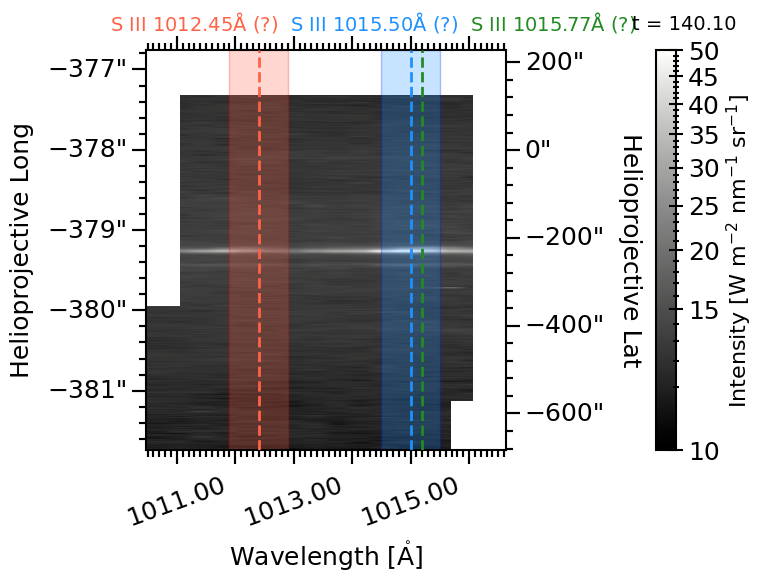

In [15]:
### Here we select a time in the flare to see how much the line is broadened
ind = 27
print(times_lyb_cont[ind])

savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/'
fname_out = 'SPICE_Spectrogram_23rdMarch2024_V02_251658348-013_SIII_maybe'

## Make a slice of just the x-position and spectral-position
ndslice_exp_lyb_cont = window_lyb_cont[ind,:,:,0]

## In this we invert the x and y axes to have wavelength along the bottom.
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_exp_lyb_cont.wcs,slices=('y', 'x'))

## Put a '1' at the start to have no normalisation
norm = mpl.colors.PowerNorm(0.5, vmin=10, vmax=50)
im = ax.imshow(ndslice_exp_lyb_cont.data.transpose(), 
               norm = norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.gray)

## Guess of rest-ish wavelengths of the two lines of interest in this window
rest_siii_1 = 101.24
rest_siii_2 = 101.50
rest_siii_3 = 101.520

## The pixel numbers for those wavelengths
pix_siii_1 = SPICE_anal.wavel2pix(ndslice_exp_lyb_cont, rest_siii_1, outputall=False, verbose=False)
pix_siii_2 = SPICE_anal.wavel2pix(ndslice_exp_lyb_cont, rest_siii_2, outputall=False, verbose=False)
pix_siii_3 = SPICE_anal.wavel2pix(ndslice_exp_lyb_cont, rest_siii_3, outputall=False, verbose=False)

ax.axvline(x=pix_siii_1, linestyle = '--', linewidth = 2, color = 'tomato')
ax.axvline(x=pix_siii_2, linestyle = '--', linewidth = 2, color = 'dodgerblue')
ax.axvline(x=pix_siii_3, linestyle = '--', linewidth = 2, color = 'forestgreen')

## Some formatting and conversion of wavelength axis
ax.coords[2].set_ticklabel(exclude_overlapping=True)
ax.coords[2].set_format_unit(u.angstrom)
ax.coords[2].set_major_formatter('x.xx')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.coords[2].set_ticklabel(rotation=20, pad=30)

## Some formatting of spatial axes
ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.tick_params(axis='both', which='both', direction='out')

# The wavelengths that define the extent of the line(s)
w1_siii_1 = rest_siii_1-.05
w2_siii_1 = rest_siii_1+.05
wlimpix_siii_1 = SPICE_anal.wavel2pix(ndslice_exp_lyb_cont, [w1_siii_1,w2_siii_1], outputall=False, verbose=False)
r_siii_1 = Rectangle((wlimpix_siii_1[0], 0), wlimpix_siii_1[1]-wlimpix_siii_1[0], ndslice_exp_lyb_cont.data.shape[1], 
                   edgecolor='red', facecolor='tomato', alpha = 0.25)
ax.add_patch(r_siii_1)

w1_siii_2 = rest_siii_2-.05
w2_siii_2 = rest_siii_2+.05
wlimpix_siii_2 = SPICE_anal.wavel2pix(ndslice_exp_lyb_cont, [w1_siii_2,w2_siii_2], outputall=False, verbose=False)
r_siii_2 = Rectangle((wlimpix_siii_2[0], 0), wlimpix_siii_2[1]-wlimpix_siii_2[0], ndslice_exp_lyb_cont.data.shape[1], 
                   edgecolor='blue', facecolor='dodgerblue', alpha = 0.25)
ax.add_patch(r_siii_2)

# w1_fexviii = rest_fexviii-.05
# w2_fexviii = rest_fexviii+.05
# wlimpix_fexviii = SPICE_anal.wavel2pix(ndslice_exp_lyb_cont, [w1_fexviii,w2_fexviii], outputall=False, verbose=False)
# r_fexviii = Rectangle((wlimpix_fexviii[0], 0), wlimpix_fexviii[1]-wlimpix_fexviii[0], ndslice_exp_lyb_cont.data.shape[1], 
#                    edgecolor='green', facecolor='forestgreen', alpha = 0.25)
# ax.add_patch(r_fexviii)

ax.text(-0.1, 1.05, 'S III 1012.45$\mathrm{\AA}$ (?)', 
         color = 'tomato',transform=ax.transAxes, fontsize = 14) 
ax.text(0.4, 1.05, 'S III 1015.50$\mathrm{\AA}$ (?)', 
         color = 'dodgerblue',transform=ax.transAxes, fontsize = 14) 
ax.text(0.9, 1.05, 'S III 1015.77$\mathrm{\AA}$ (?)', 
         color = 'forestgreen',transform=ax.transAxes, fontsize = 14) 
ax.text(1.35, 1.05, 't = %0.2f' %(times_oiii[ind].value), 
         color = 'black',transform=ax.transAxes, fontsize = 14) 

# 1012.45, 1015.50 and 1015.77
cbar = plt.colorbar(im, pad=0.25)
cbar.set_label('Intensity [W m$^{-2}$ nm$^{-1}$ sr$^{-1}$]', size=16)

if savepng == True:
    plt.savefig(dirout+fname_out+'_%04d.png' %(ind), format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'_%04d.pdf' %(ind), format='pdf', bbox_inches = 'tight', dpi=300)

plt.show()

140.10027000000002 s


2024-05-09 14:46:26 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


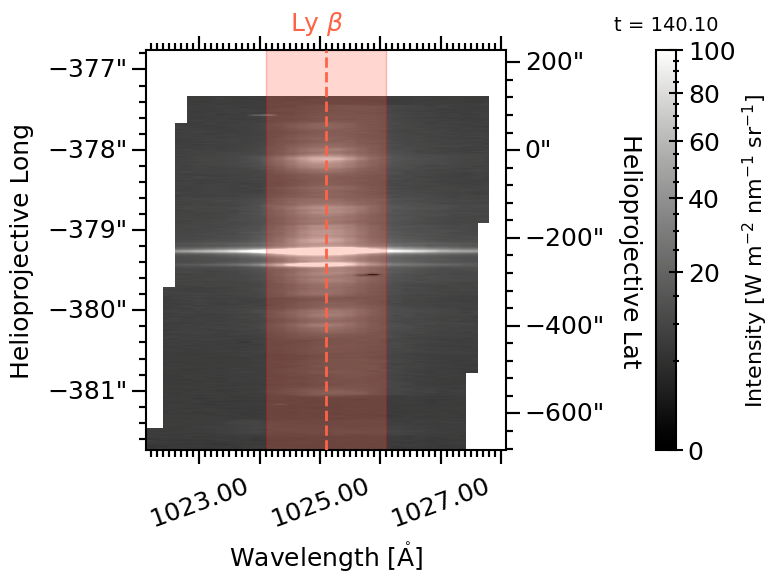

In [16]:
### Here we select a time in the flare to see how much the line is broadened
ind = 27
print(times_lyb[ind])

savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spectrogram_23rdMarch2024_V02_251658348-013_Lyb'

## Make a slice of just the x-position and spectral-position
ndslice_exp_lyb = window_lyb[ind,:,:,0]

## In this we invert the x and y axes to have wavelength along the bottom.
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_exp_lyb.wcs,slices=('y', 'x'))

## Put a '1' at the start to have no normalisation
norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=100)
im = ax.imshow(ndslice_exp_lyb.data.transpose(), 
               norm = norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.gray)

## Guess of rest-ish wavelengths of the two lines of interest in this window
rest_lyb = 102.51

## The pixel numbers for those wavelengths
pix_lyb = SPICE_anal.wavel2pix(ndslice_exp_lyb, rest_lyb, outputall=False, verbose=False)

ax.axvline(x=pix_lyb, linestyle = '--', linewidth = 2, color = 'tomato')

## Some formatting and conversion of wavelength axis
ax.coords[2].set_ticklabel(exclude_overlapping=True)
ax.coords[2].set_format_unit(u.angstrom)
ax.coords[2].set_major_formatter('x.xx')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.coords[2].set_ticklabel(rotation=20, pad=30)

## Some formatting of spatial axes
ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.tick_params(axis='both', which='both', direction='out')

# The wavelengths that define the extent of the line(s)
w1_lyb = rest_lyb-.1
w2_lyb = rest_lyb+.1
wlimpix_lyb = SPICE_anal.wavel2pix(ndslice_exp_lyb, [w1_lyb,w2_lyb], outputall=False, verbose=False)
r_lyb = Rectangle((wlimpix_lyb[0], 0), wlimpix_lyb[1]-wlimpix_lyb[0], ndslice_exp_lyb.data.shape[1], 
                   edgecolor='red', facecolor='tomato', alpha = 0.25)
ax.add_patch(r_lyb)

ax.text(0.4, 1.05, r'Ly $\beta$', 
         color = 'tomato',transform=ax.transAxes) 
ax.text(1.3, 1.05, 't = %0.2f' %(times_oiii[ind].value), 
         color = 'black',transform=ax.transAxes, fontsize = 14) 

cbar = plt.colorbar(im, pad=0.25)
cbar.set_label('Intensity [W m$^{-2}$ nm$^{-1}$ sr$^{-1}$]', size=16)

if savepng == True:
    plt.savefig(dirout+fname_out+'_%04d.png' %(ind), format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'_%04d.pdf' %(ind), format='pdf', bbox_inches = 'tight', dpi=300)

plt.show()

<>:63: SyntaxWarning: invalid escape sequence '\m'
<>:63: SyntaxWarning: invalid escape sequence '\m'
/var/folders/l1/yzsqvl8s63v89bbw0sxv0z1m0000gn/T/ipykernel_11673/866275791.py:63: SyntaxWarning: invalid escape sequence '\m'
  ax.text(0.25, 1.05, 'O VI 1032 $\mathrm{\AA}$',


124.80024 s


2024-05-09 14:46:33 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


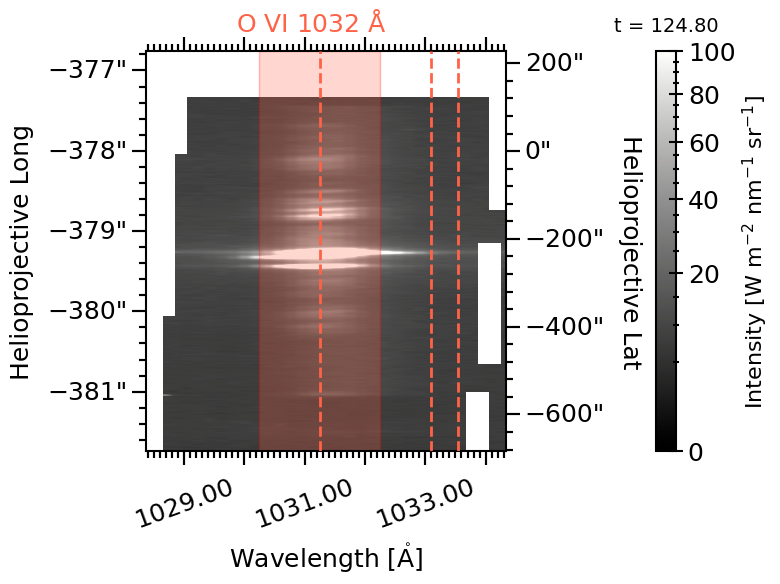

In [17]:
# Here we select a time in the flare to see how much the line is broadened
ind = 24
print(times_ovi_1032[ind])

savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spectrogram_23rdMarch2024_V02_251658348-013_OVI1302'

## Make a slice of just the x-position and spectral-position
ndslice_exp_ovi_1032 = window_ovi_1032[ind,:,:,0]

## In this we invert the x and y axes to have wavelength along the bottom.
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_exp_ovi_1032.wcs,slices=('y', 'x'))

## Put a '1' at the start to have no normalisation
norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=100)
im = ax.imshow(ndslice_exp_ovi_1032.data.transpose(), 
               norm = norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.gray)

## Guess of rest-ish wavelengths of the two lines of interest in this window
rest_ovi_1032 = 103.125
w1_ovi_1032_cont = 103.31
w2_ovi_1032_cont = 103.355

## The pixel numbers for those wavelengths
pix_ovi_1032 = SPICE_anal.wavel2pix(ndslice_exp_ovi_1032, rest_ovi_1032, outputall=False, verbose=False)
pix_ovi_1032_cont1 = SPICE_anal.wavel2pix(ndslice_exp_ovi_1032, w1_ovi_1032_cont, outputall=False, verbose=False)
pix_ovi_1032_cont2 = SPICE_anal.wavel2pix(ndslice_exp_ovi_1032, w2_ovi_1032_cont, outputall=False, verbose=False)

ax.axvline(x=pix_ovi_1032, linestyle = '--', linewidth = 2, color = 'tomato')
ax.axvline(x=pix_ovi_1032_cont1, linestyle = '--', linewidth = 2, color = 'tomato')
ax.axvline(x=pix_ovi_1032_cont2, linestyle = '--', linewidth = 2, color = 'tomato')

## Some formatting and conversion of wavelength axis
ax.coords[2].set_ticklabel(exclude_overlapping=True)
ax.coords[2].set_format_unit(u.angstrom)
ax.coords[2].set_major_formatter('x.xx')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.coords[2].set_ticklabel(rotation=20, pad=30)

## Some formatting of spatial axes
ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.tick_params(axis='both', which='both', direction='out')

# The wavelengths that define the extent of the line(s)
w1_ovi_1032 = rest_ovi_1032-.1
w2_ovi_1032 = rest_ovi_1032+.1
wlimpix_ovi_1032 = SPICE_anal.wavel2pix(ndslice_exp_ovi_1032, [w1_ovi_1032,w2_ovi_1032], outputall=False, verbose=False)
r_ovi_1032 = Rectangle((wlimpix_ovi_1032[0], 0), wlimpix_ovi_1032[1]-wlimpix_ovi_1032[0], ndslice_exp_ovi_1032.data.shape[1], 
                   edgecolor='red', facecolor='tomato', alpha = 0.25)
ax.add_patch(r_ovi_1032)

ax.text(0.25, 1.05, 'O VI 1032 $\mathrm{\AA}$', 
         color = 'tomato',transform=ax.transAxes) 
ax.text(1.3, 1.05, 't = %0.2f' %(times_oiii[ind].value), 
         color = 'black',transform=ax.transAxes, fontsize = 14) 

cbar = plt.colorbar(im, pad=0.25)
cbar.set_label('Intensity [W m$^{-2}$ nm$^{-1}$ sr$^{-1}$]', size=16)

if savepng == True:
    plt.savefig(dirout+fname_out+'_%04d.png' %(ind), format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'_%04d.pdf' %(ind), format='pdf', bbox_inches = 'tight', dpi=300)

plt.show()

<>:57: SyntaxWarning: invalid escape sequence '\m'
<>:57: SyntaxWarning: invalid escape sequence '\m'
/var/folders/l1/yzsqvl8s63v89bbw0sxv0z1m0000gn/T/ipykernel_11673/1379579408.py:57: SyntaxWarning: invalid escape sequence '\m'
  ax.text(0.25, 1.05, 'O VI 1037 $\mathrm{\AA}$',


140.10027000000002 s


2024-05-09 14:46:39 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


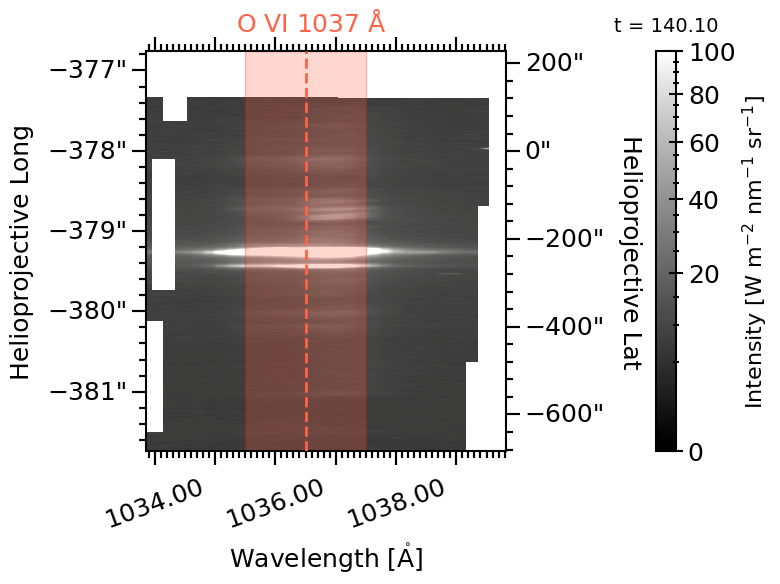

In [18]:
### Here we select a time in the flare to see how much the line is broadened
ind = 27
print(times_ovi_1037[ind])

savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spectrogram_23rdMarch2024_V02_251658348-013_OVI1307'

## Make a slice of just the x-position and spectral-position
ndslice_exp_ovi_1037 = window_ovi_1037[ind,:,:,0]

## In this we invert the x and y axes to have wavelength along the bottom.
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_exp_ovi_1037.wcs,slices=('y', 'x'))

## Put a '1' at the start to have no normalisation
norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=100)
im = ax.imshow(ndslice_exp_ovi_1037.data.transpose(), 
               norm = norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.gray)

## Guess of rest-ish wavelengths of the two lines of interest in this window
rest_ovi_1037 = 103.65

## The pixel numbers for those wavelengths
pix_ovi_1037 = SPICE_anal.wavel2pix(ndslice_exp_ovi_1037, rest_ovi_1037, outputall=False, verbose=False)

ax.axvline(x=pix_ovi_1037, linestyle = '--', linewidth = 2, color = 'tomato')

## Some formatting and conversion of wavelength axis
ax.coords[2].set_ticklabel(exclude_overlapping=True)
ax.coords[2].set_format_unit(u.angstrom)
ax.coords[2].set_major_formatter('x.xx')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.coords[2].set_ticklabel(rotation=20, pad=30)

## Some formatting of spatial axes
ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(10)
ax.tick_params(axis='both', which='both', direction='out')

# The wavelengths that define the extent of the line(s)
w1_ovi_1037 = rest_ovi_1037-.1
w2_ovi_1037 = rest_ovi_1037+.1
wlimpix_ovi_1037 = SPICE_anal.wavel2pix(ndslice_exp_ovi_1037, [w1_ovi_1037,w2_ovi_1037], outputall=False, verbose=False)
r_ovi_1037 = Rectangle((wlimpix_ovi_1037[0], 0), wlimpix_ovi_1037[1]-wlimpix_ovi_1037[0], ndslice_exp_ovi_1037.data.shape[1], 
                   edgecolor='red', facecolor='tomato', alpha = 0.25)
ax.add_patch(r_ovi_1037)

ax.text(0.25, 1.05, 'O VI 1037 $\mathrm{\AA}$', 
         color = 'tomato',transform=ax.transAxes) 
ax.text(1.3, 1.05, 't = %0.2f' %(times_oiii[ind].value), 
         color = 'black',transform=ax.transAxes, fontsize = 14) 

cbar = plt.colorbar(im, pad=0.25)
cbar.set_label('Intensity [W m$^{-2}$ nm$^{-1}$ sr$^{-1}$]', size=16)

if savepng == True:
    plt.savefig(dirout+fname_out+'_%04d.png' %(ind), format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'_%04d.pdf' %(ind), format='pdf', bbox_inches = 'tight', dpi=300)

plt.show()

---
---
---
### <b style="color:blue"> Plot Space Time Maps </b>


2024-05-09 14:46:43 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:46:46 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


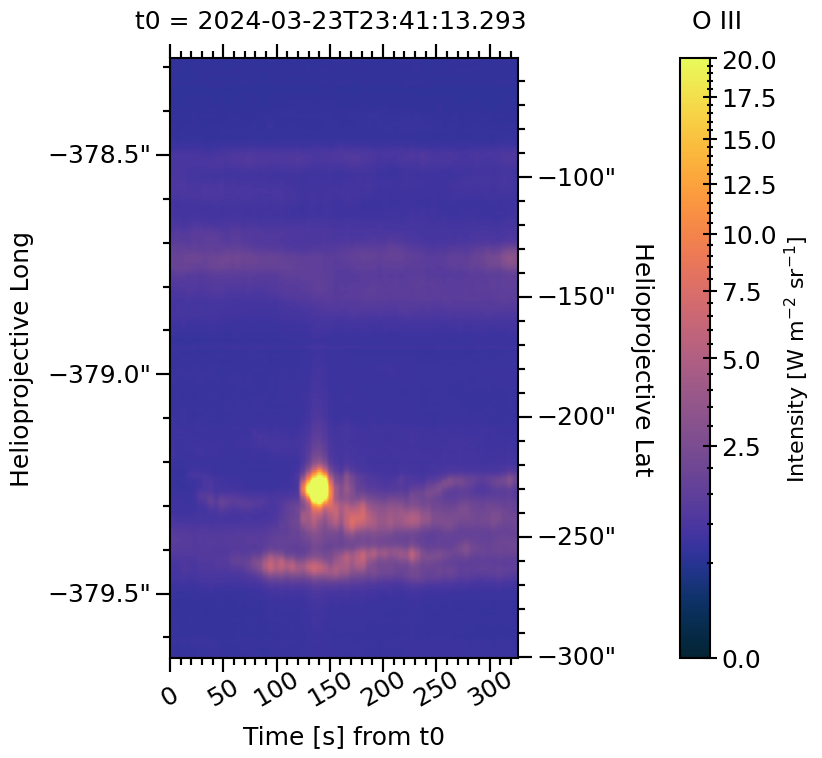

In [19]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_OIII'


ndslice_integ_oiii = SPICE_anal.wintegrate_stare_trapz(window_oiii, 
                                                       w1 = w1_oiii, 
                                                       w2 = w2_oiii,
                                                       wavels = wavels_oiii)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_oiii[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=20)
im = ax.imshow(ndslice_integ_oiii[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_oiii, [-380],[-300,-50], frame=None, wavel=0, time=window_oiii.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'O III', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 

if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

2024-05-09 14:46:52 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:46:54 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


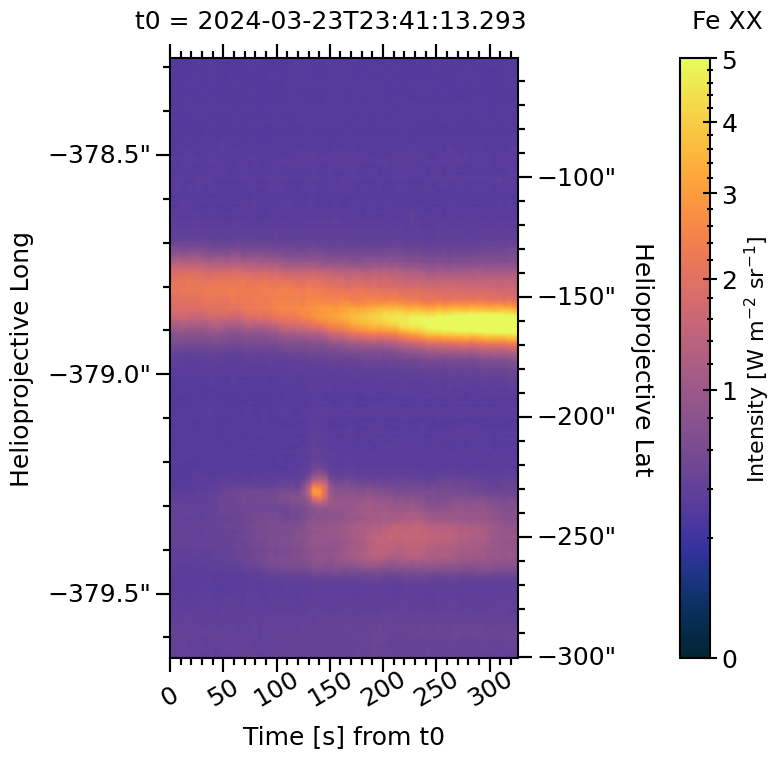

In [20]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_FeXX'

ndslice_integ_fexx = SPICE_anal.wintegrate_stare_trapz(window_fexx, 
                                                       w1 = w1_fexx, 
                                                       w2 = w2_fexx,
                                                       wavels = wavels_fexx)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_fexx[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=5)
im = ax.imshow(ndslice_integ_fexx[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_fexx, [-380],[-300,-50], frame=None, wavel=0, time=window_fexx.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'Fe XX', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 

if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

2024-05-09 14:46:56 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:46:58 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


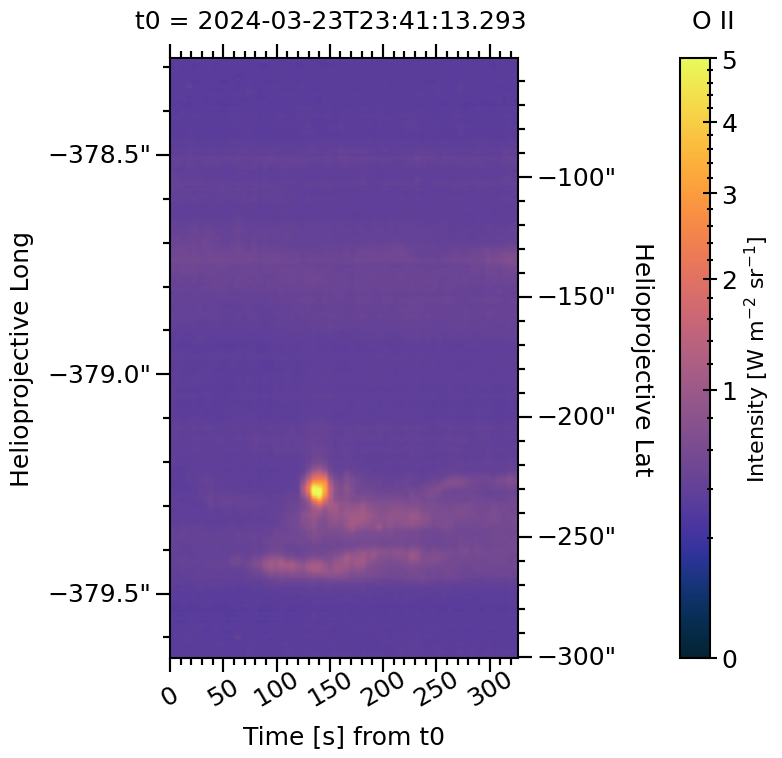

In [21]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_OII'

ndslice_integ_oii = SPICE_anal.wintegrate_stare_trapz(window_fexx, 
                                                       w1 = w1_oii, 
                                                       w2 = w2_oii,
                                                       wavels = wavels_fexx)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_oii[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=5)
im = ax.imshow(ndslice_integ_oii[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_fexx, [-380],[-300,-50], frame=None, wavel=0, time=window_fexx.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'O II', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 

if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)

plt.show()

2024-05-09 14:46:59 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:47:01 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


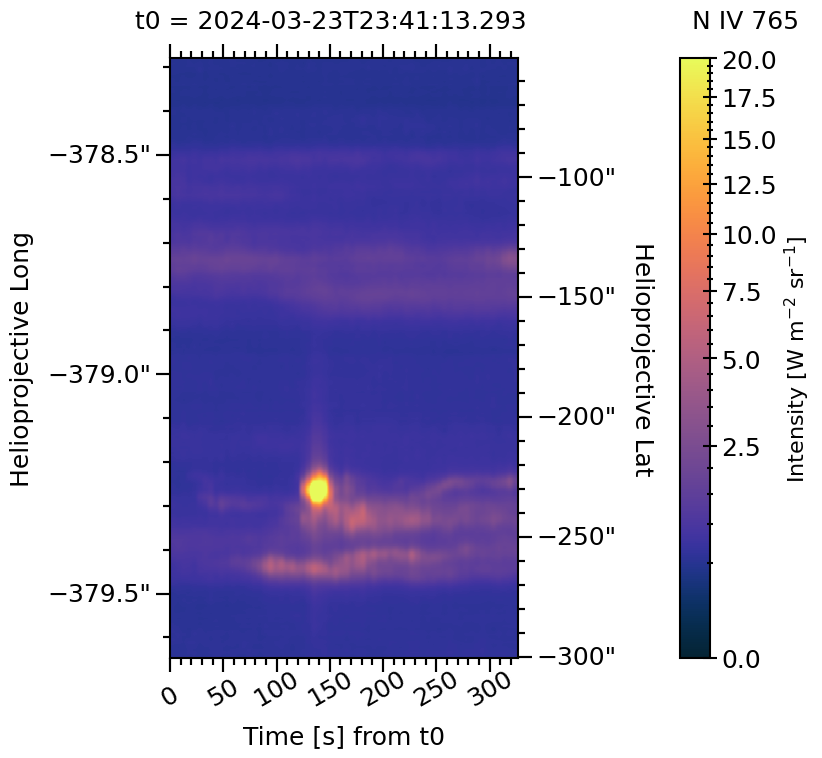

In [22]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_NIV'

ndslice_integ_niv = SPICE_anal.wintegrate_stare_trapz(window_niv, 
                                                       w1 = w1_niv, 
                                                       w2 = w2_niv,
                                                       wavels = wavels_niv)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_niv[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=20)
im = ax.imshow(ndslice_integ_niv[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_niv, [-380],[-300,-50], frame=None, wavel=0, time=window_niv.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'N IV 765', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 

if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)

plt.show()

2024-05-09 14:47:03 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:47:05 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


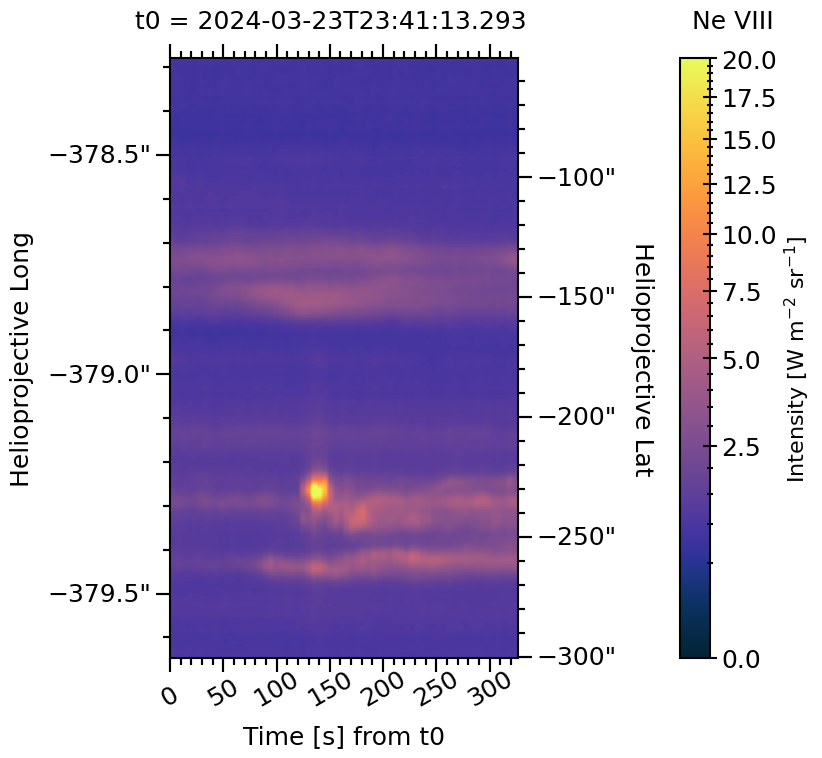

In [23]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_NeVIII'

ndslice_integ_neviii = SPICE_anal.wintegrate_stare_trapz(window_neviii, 
                                                       w1 = w1_neviii, 
                                                       w2 = w2_neviii,
                                                       wavels = wavels_neviii)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_neviii[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=20)
im = ax.imshow(ndslice_integ_neviii[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_neviii, [-380],[-300,-50], frame=None, wavel=0, time=window_neviii.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'Ne VIII', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

<>:36: SyntaxWarning: invalid escape sequence '\g'
<>:36: SyntaxWarning: invalid escape sequence '\g'
/var/folders/l1/yzsqvl8s63v89bbw0sxv0z1m0000gn/T/ipykernel_11673/1845628434.py:36: SyntaxWarning: invalid escape sequence '\g'
  ax.text(1.5, 1.05, 'Ly $\gamma$',
2024-05-09 14:47:06 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:47:08 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


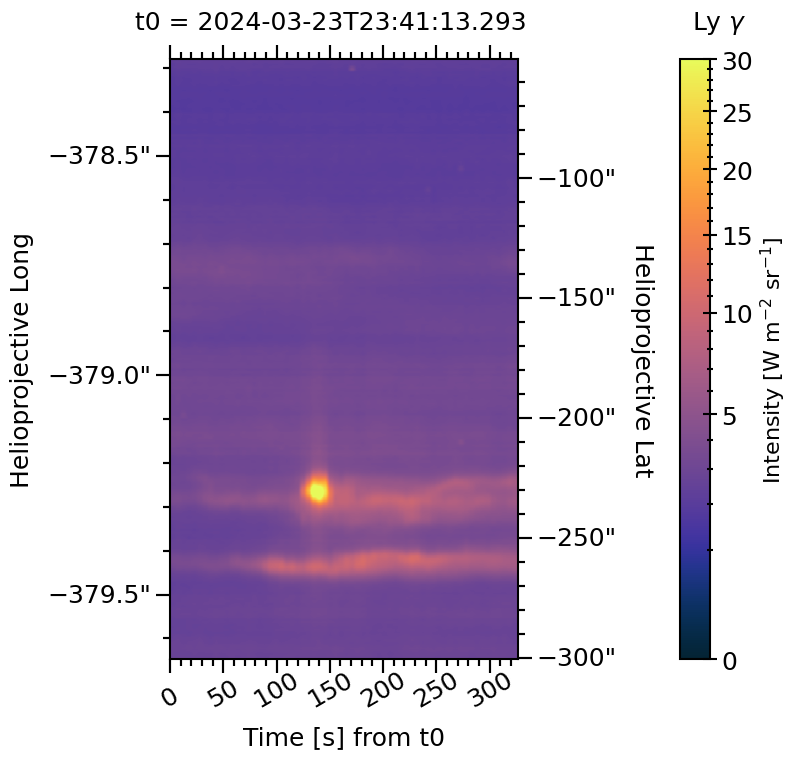

In [24]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_Lyg'

ndslice_integ_lyg = SPICE_anal.wintegrate_stare_trapz(window_lyg, 
                                                       w1 = w1_lyg, 
                                                       w2 = w2_lyg,
                                                       wavels = wavels_lyg)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_lyg[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=30)
im = ax.imshow(ndslice_integ_lyg[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_lyg, [-380],[-300,-50], frame=None, wavel=0, time=window_lyg.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'Ly $\gamma$', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 

if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)

plt.show()

2024-05-09 14:47:10 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:47:12 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


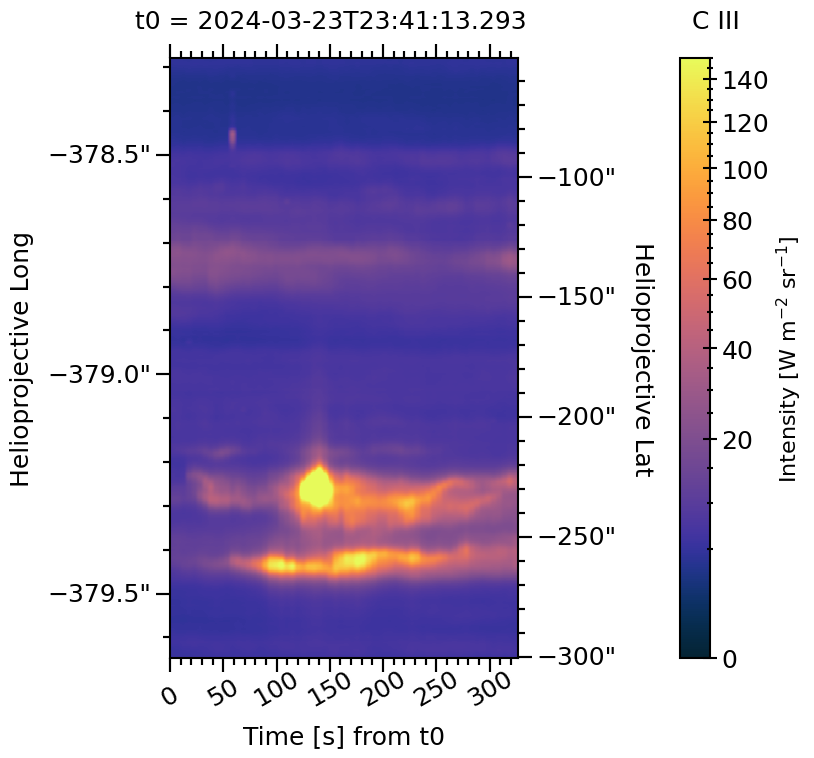

In [25]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_CIII'

ndslice_integ_ciii = SPICE_anal.wintegrate_stare_trapz(window_lyg, 
                                                       w1 = w1_ciii, 
                                                       w2 = w2_ciii,
                                                       wavels = wavels_lyg)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_ciii[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=150)
im = ax.imshow(ndslice_integ_ciii[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_lyg, [-380],[-300,-50], frame=None, wavel=0, time=window_lyg.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'C III ', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

2024-05-09 14:47:13 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:47:15 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


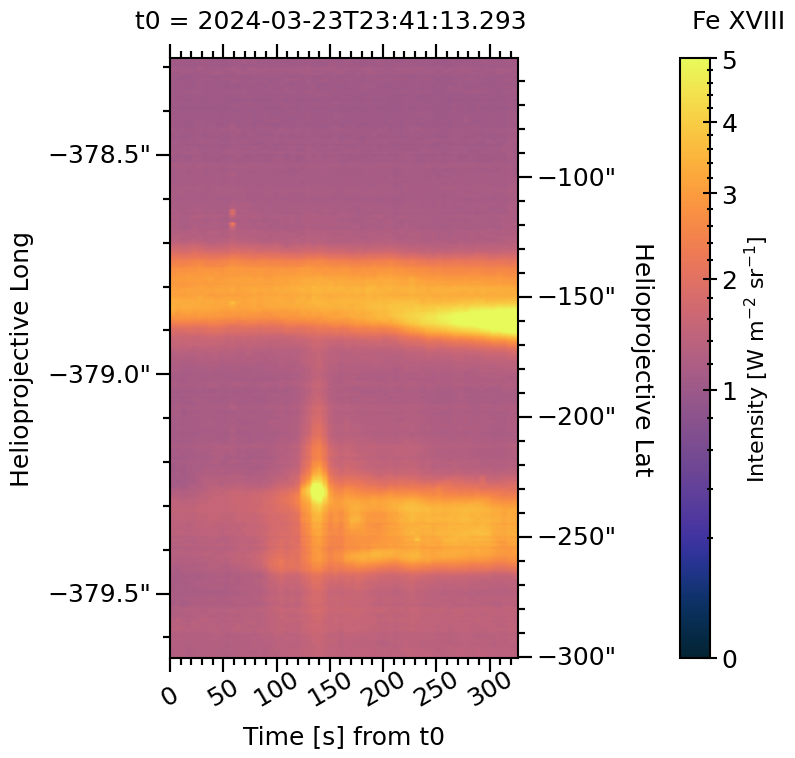

In [26]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_FeXVIII'

ndslice_integ_fexviii = SPICE_anal.wintegrate_stare_trapz(window_lyg, 
                                                       w1 = w1_fexviii, 
                                                       w2 = w2_fexviii,
                                                       wavels = wavels_lyg)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_fexviii[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=5)
im = ax.imshow(ndslice_integ_fexviii[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_lyg, [-380],[-300,-50], frame=None, wavel=0, time=window_lyg.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'Fe XVIII', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 

if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)

plt.show()

2024-05-09 14:47:17 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:47:19 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


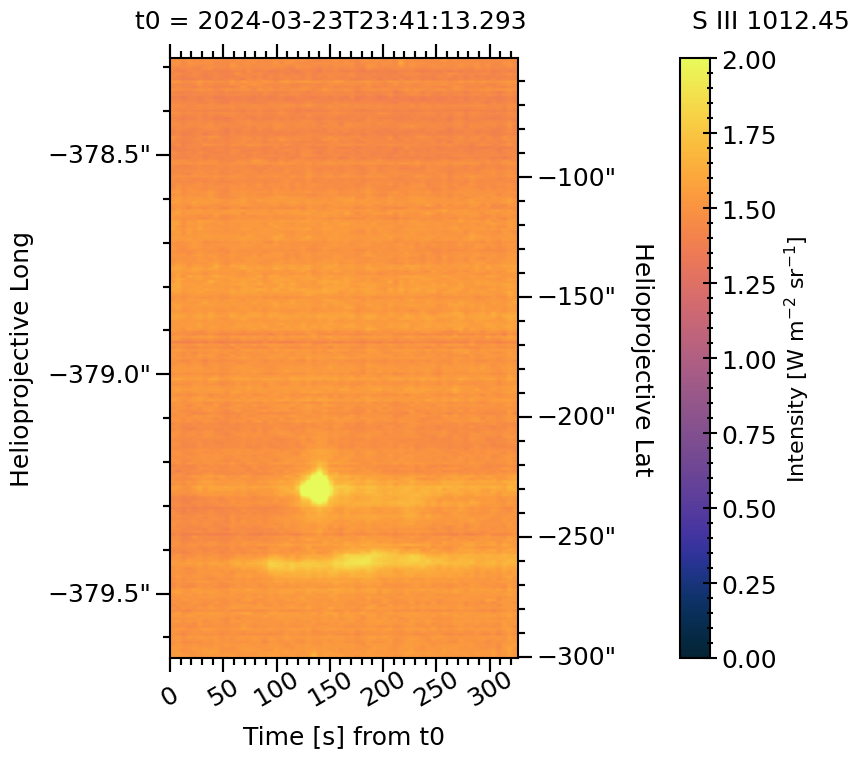

In [27]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_SIII_maybe'

ndslice_integ_siii_1 = SPICE_anal.wintegrate_stare_trapz(window_lyb_cont, 
                                                       w1 = w1_siii_1, 
                                                       w2 = w2_siii_1,
                                                       wavels = wavels_lyb_cont)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_siii_1[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(1, vmin=0, vmax=2)
im = ax.imshow(ndslice_integ_siii_1[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_lyb_cont, [-380],[-300,-50], frame=None, wavel=0, time=window_lyg.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'S III 1012.45', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
# 1012.45, 1015.50 and 1015.77
if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

2024-05-09 14:47:20 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:47:22 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


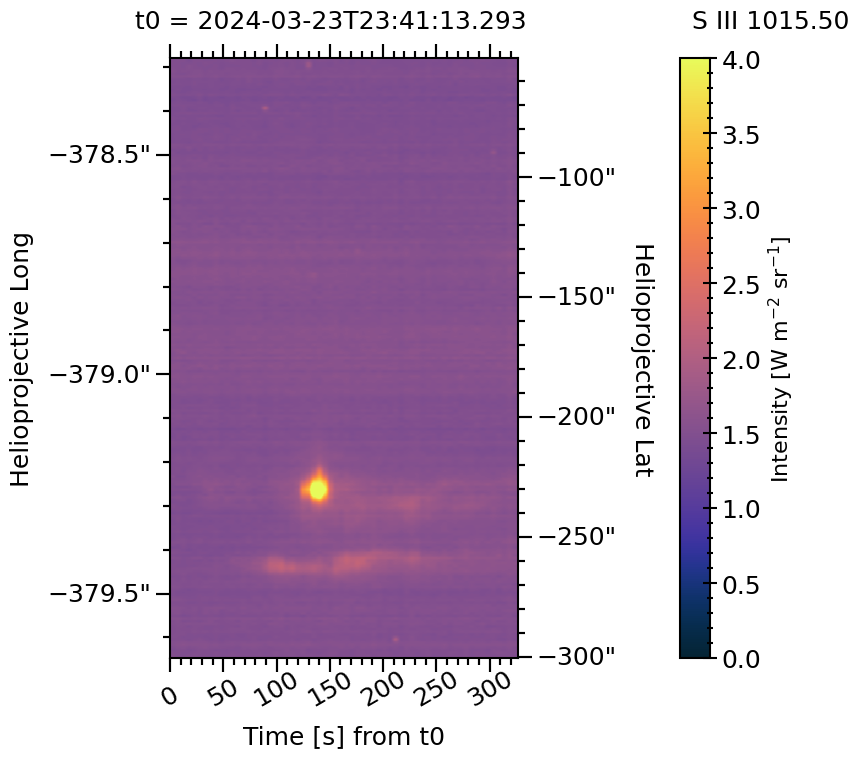

In [28]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_SiIII_2_maybe'

ndslice_integ_siii_2 = SPICE_anal.wintegrate_stare_trapz(window_lyb_cont, 
                                                       w1 = w1_siii_2, 
                                                       w2 = w2_siii_2,
                                                       wavels = wavels_lyb_cont)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_siii_2[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(1, vmin=0, vmax=4)
im = ax.imshow(ndslice_integ_siii_2[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_lyb_cont, [-380],[-300,-50], frame=None, wavel=0, time=window_lyg.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'S III 1015.50', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
# 1012.45, 1015.50 and 1015.77
if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

2024-05-09 14:47:24 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:47:26 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


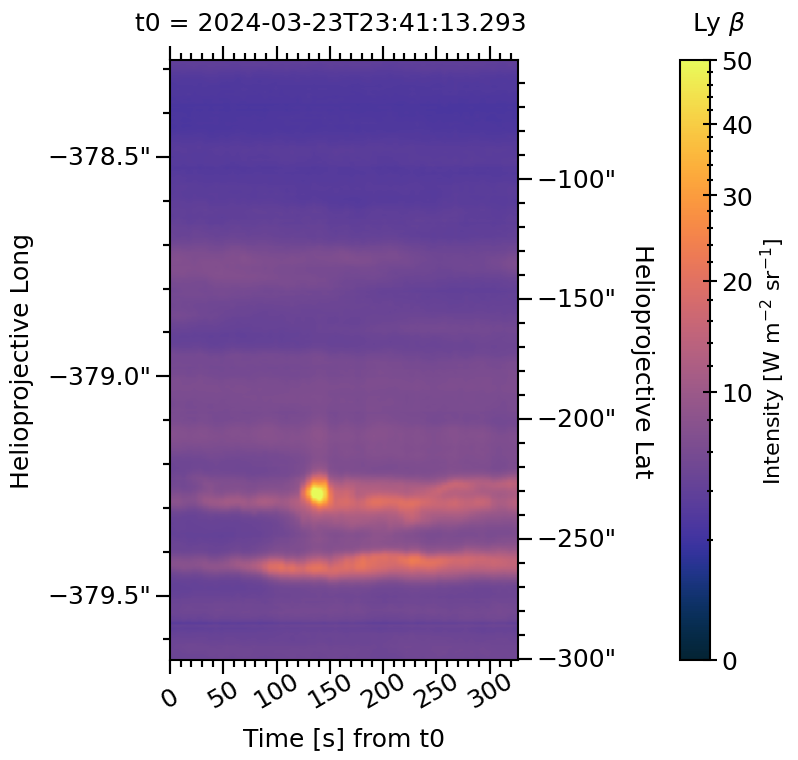

In [29]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_Lyb'

ndslice_integ_lyb = SPICE_anal.wintegrate_stare_trapz(window_lyb, 
                                                       w1 = w1_lyb, 
                                                       w2 = w2_lyb,
                                                       wavels = wavels_lyb)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_lyb[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=50)
im = ax.imshow(ndslice_integ_lyb[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_lyb, [-380],[-300,-50], frame=None, wavel=0, time=window_lyg.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, r'Ly $\beta$', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

2024-05-09 14:47:28 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:47:30 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


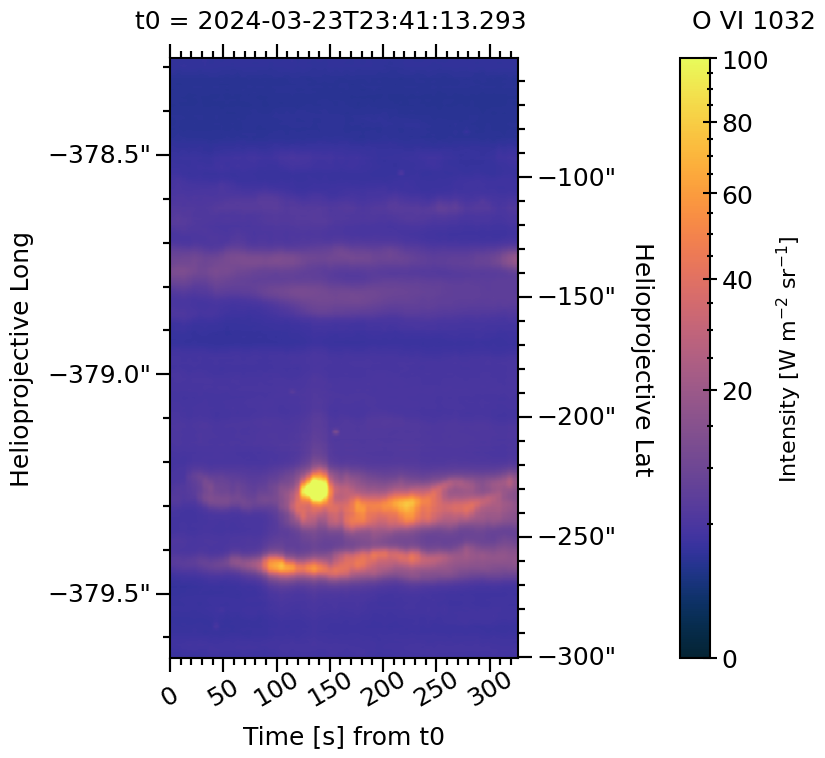

In [30]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_OVI1032'

ndslice_integ_ovi_1032 = SPICE_anal.wintegrate_stare_trapz(window_ovi_1032, 
                                                       w1 = w1_ovi_1032, 
                                                       w2 = w2_ovi_1032,
                                                       wavels = wavels_ovi_1032)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_ovi_1032[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=100)
im = ax.imshow(ndslice_integ_ovi_1032[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_ovi_1032, [-380],[-300,-50], frame=None, wavel=0, time=window_lyg.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'O VI 1032', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

2024-05-09 14:47:31 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:47:33 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


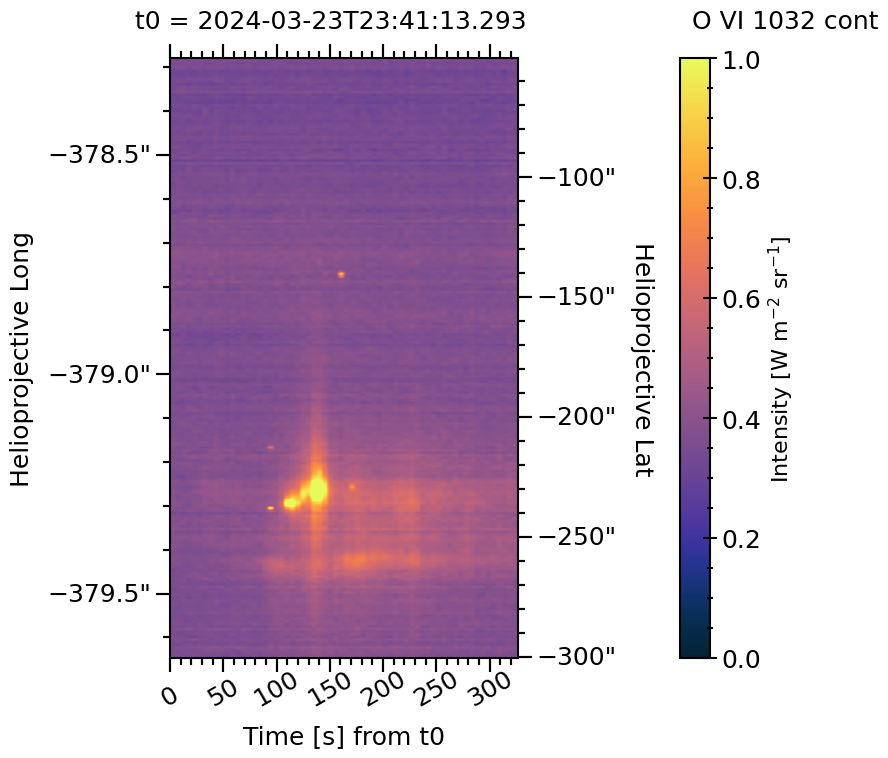

In [31]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_OVI1032_continuum'

ndslice_integ_ovi_1032_cont = SPICE_anal.wintegrate_stare_trapz(window_ovi_1032, 
                                                       w1 = w1_ovi_1032_cont, 
                                                       w2 = w2_ovi_1032_cont,
                                                       wavels = wavels_ovi_1032)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_ovi_1032_cont[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(1, vmin=0, vmax=1)
im = ax.imshow(ndslice_integ_ovi_1032_cont[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_ovi_1032, [-380],[-300,-50], frame=None, wavel=0, time=window_lyg.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'O VI 1032 cont', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 

if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)

plt.show()

2024-05-09 14:47:35 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
2024-05-09 14:47:37 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


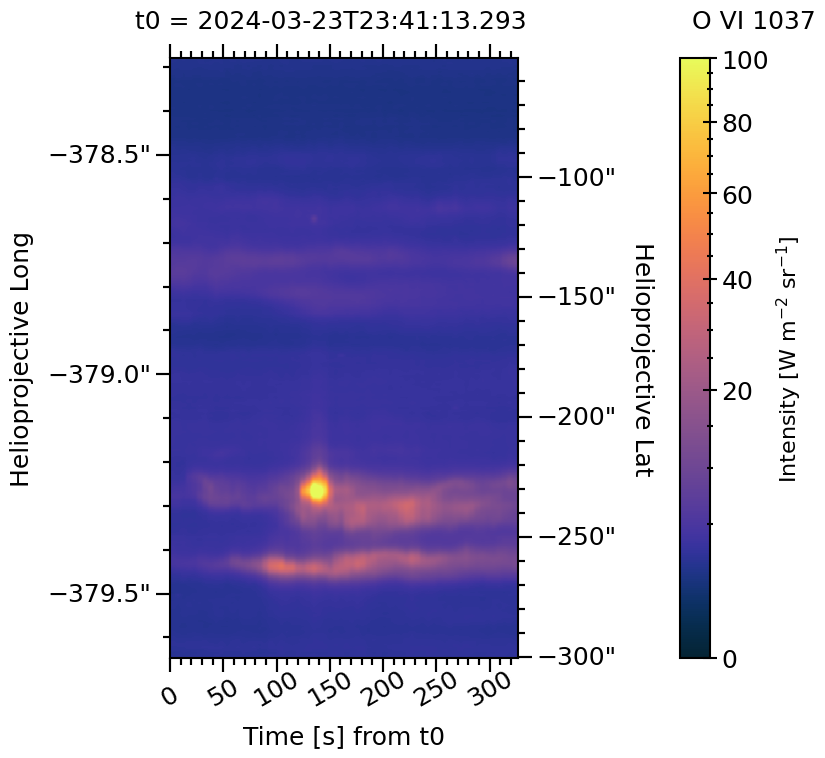

In [32]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_OVI1037'

ndslice_integ_ovi_1037 = SPICE_anal.wintegrate_stare_trapz(window_ovi_1037, 
                                                       w1 = w1_ovi_1037, 
                                                       w2 = w2_ovi_1037,
                                                       wavels = wavels_ovi_1037)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_ovi_1037[:,0,:].wcs,slices=('y', 'x'))

norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=100)
im = ax.imshow(ndslice_integ_ovi_1037[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_ovi_1037, [-380],[-300,-50], frame=None, wavel=0, time=window_lyg.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'O VI 1037', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
if savepng == True:
    plt.savefig(dirout+fname_out+'.png', format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf', format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

---
---
---
### <b style="color:blue"> Plot Space Time Maps w/overlays </b>


2024-05-09 15:21:39 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
/Users/grahamkerr/opt/anaconda3/envs/py312_solar/lib/python3.12/site-packages/astropy/visualization/wcsaxes/core.py:257: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = super().contour(*args, **kwargs)
2024-05-09 15:21:41 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


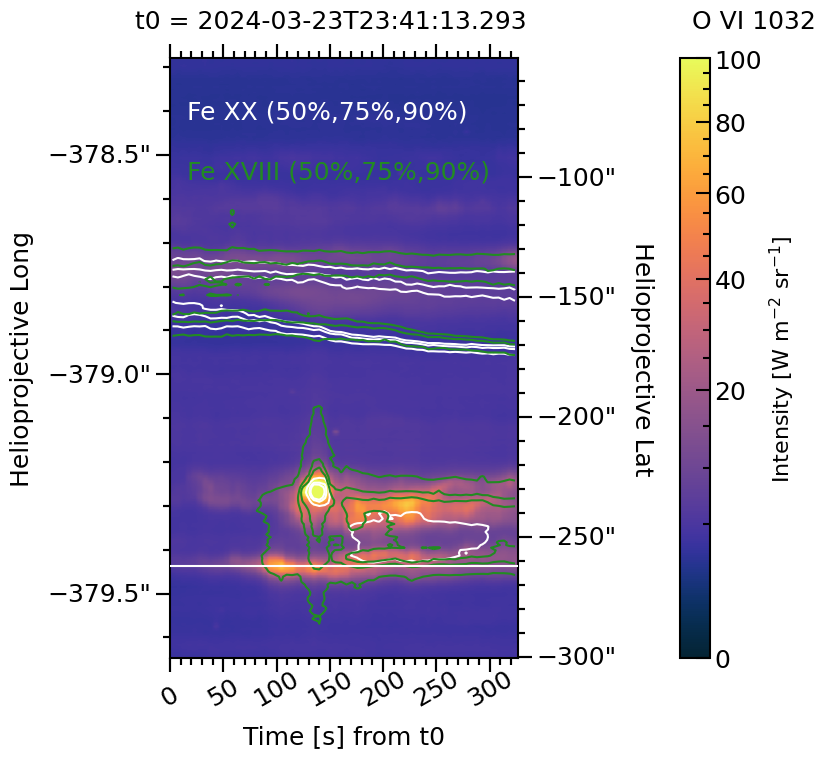

In [83]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_OVI1032_wFeXX_wFeXVIII'

ndslice_integ_ovi_1032 = SPICE_anal.wintegrate_stare_trapz(window_ovi_1032, 
                                                       w1 = w1_ovi_1032, 
                                                       w2 = w2_ovi_1032,
                                                       wavels = wavels_ovi_1032)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_ovi_1032[:,0,:].wcs, slices=('y', 'x'))

norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=100)
im = ax.imshow(ndslice_integ_ovi_1032[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

im_cont = ax.contour(ndslice_integ_fexx[:,0,:].data.T, 
                     # transform=ax.get_transform(ndslice_integ_fexx[:,0,:].wcs),
#                    levels=[1, 2, 3, 4, 5],
                     levels= [#np.nanmax(ndslice_integ_fexx[0].data)*0.10,
                              #np.nanmax(ndslice_integ_fexx[0].data)*0.25,
                              np.nanmax(ndslice_integ_fexx[0].data)*0.50,
                              np.nanmax(ndslice_integ_fexx[0].data)*0.75,
                              np.nanmax(ndslice_integ_fexx[0].data)*0.90], 
                     colors='white', 
                     linewidth = 3,
                     alpha=1)

im_cont = ax.contour(ndslice_integ_fexviii[:,0,:].data.T, 
                     # transform=ax.get_transform(ndslice_integ_fexviii[:,0,:].wcs),
#                    levels=[1, 2, 3, 4, 5],
                     levels= [#np.nanmax(ndslice_integ_fexviii[0].data)*0.10,
                              #np.nanmax(ndslice_integ_fexviii[0].data)*0.25,
                              np.nanmax(ndslice_integ_fexviii[0].data)*0.50,
                              np.nanmax(ndslice_integ_fexviii[0].data)*0.75,
                              np.nanmax(ndslice_integ_fexviii[0].data)*0.90], 
                     colors='forestgreen', 
                     linewidth = 3,
                     alpha=1)
ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_ovi_1032, [-380],[-300,-50], frame=None, wavel=0, time=window_lyg.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'O VI 1032', 
         color = 'black',transform=ax.transAxes)
ax.text(0.05, 0.9, 'Fe XX (50%,75%,90%)', 
         color = 'white',transform=ax.transAxes)
ax.text(0.05, 0.8, 'Fe XVIII (50%,75%,90%)', 
         color = 'forestgreen',transform=ax.transAxes)
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 

ax.axhline(y=384, color = 'white')
if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()


2024-05-09 14:51:23 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change
/Users/grahamkerr/opt/anaconda3/envs/py312_solar/lib/python3.12/site-packages/astropy/visualization/wcsaxes/core.py:257: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = super().contour(*args, **kwargs)
2024-05-09 14:51:25 - astropy - WARNING: No observer defined on WCS, SpectralCoord will be converted without any velocity frame change


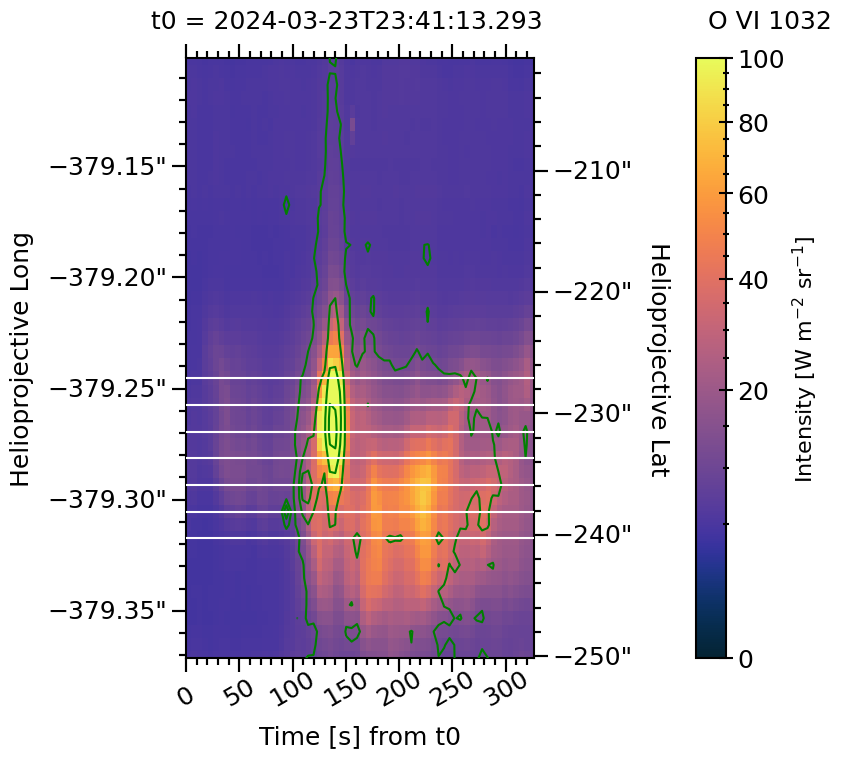

In [42]:
savepng = False
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_Spacetime_23rdMarch2024_V02_251658348-013_OVI1032_wContinuum1034'

ndslice_integ_ovi_1032 = SPICE_anal.wintegrate_stare_trapz(window_ovi_1032, 
                                                       w1 = w1_ovi_1032, 
                                                       w2 = w2_ovi_1032,
                                                       wavels = wavels_ovi_1032)


fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ndslice_integ_ovi_1032[:,0,:].wcs, slices=('y', 'x'))

norm = mpl.colors.PowerNorm(0.5, vmin=0, vmax=100)
im = ax.imshow(ndslice_integ_ovi_1032[:,0,:].data.T, 
               norm=norm,
               origin='lower', aspect = 'auto',
               cmap = cmocean.cm.thermal)

im_cont = ax.contour(ndslice_integ_ovi_1032_cont[:,0,:].data.T, 
                     # transform=ax.get_transform(ndslice_integ_fexx[:,0,:].wcs),
                     levels=[0.5, 0.75, 1.0, 1.25,1.50],
                     #levels= [np.nanmax(ndslice_integ_fexx[0].data)*0.10,
                              #np.nanmax(ndslice_integ_ovi_1032_cont[0].data)*0.25,
                              #np.nanmax(ndslice_integ_ovi_1032_cont[0].data)*0.50,
                              #np.nanmax(ndslice_integ_ovi_1032_cont[0].data)*0.75,
                              #np.nanmax(ndslice_integ_ovi_1032_cont[0].data)*0.90], 
                     colors='green', 
                     linewidth = 3,
                     alpha=1)


ax.coords[0].set_axislabel('Helioprojective Long')
ax.coords[1].set_axislabel('Helioprojective Lat')
ax.coords[2].set_axislabel('Time [s] from t0')
ax.coords[2].set_ticks_position('bt')
ax.coords[2].display_minor_ticks(True)
ax.coords[2].set_minor_frequency(5)
ax.coords[2].set_ticklabel(rotation=30, pad=10)

pixels = SPICE_anal.xy2pix(window_ovi_1032, [-380],[-250,-200], frame=None, wavel=0, time=window_lyg.time[ind], 
                           verbose=False, outputall=False)
pixels_ex = SPICE_anal.xy2pix(window_ovi_1032, [-380],[-235.5], frame=None, wavel=0, time=window_lyg.time[ind], 
                           verbose=False, outputall=False)
ax.set_ylim( int(pixels[1][0]),int(pixels[1][1]) ) 
ax.tick_params(axis='both', which='both', direction='out')
# ax.axhline(y=int(pixels_ex[1][0]), color='white')
cbar = plt.colorbar(im, pad=0.27)
cbar.set_label('Intensity [W m$^{-2}$ sr$^{-1}$]', size=16)

ax.text(1.5, 1.05, 'O VI 1032', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 

ax.axhline(y=416, color = 'white')
ax.axhline(y=414, color = 'white')
ax.axhline(y=412, color = 'white')
ax.axhline(y=410, color = 'white')
ax.axhline(y=408, color = 'white')
ax.axhline(y=406, color = 'white')
ax.axhline(y=404, color = 'white')

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()


---
---
---
### <b style="color:blue"> Plot lightcurves </b>
***Individual cuts through Northern ribbon (pixels 404 - 416, steps of 2) and southern ribbon (pixel 384)***

In [55]:
plot_dict = utils.plotsetup(font_size = 18)
plt.rcParams.update(plot_dict)

> - O III

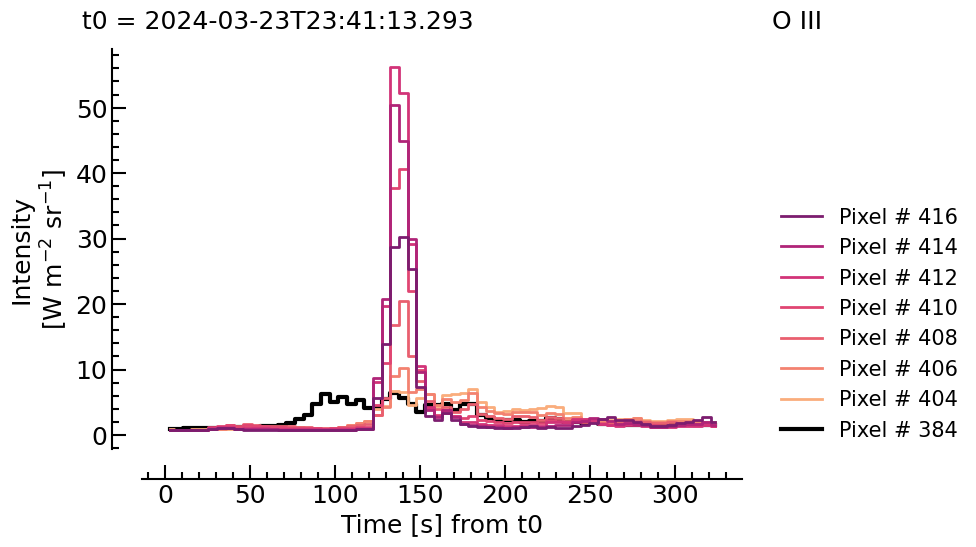

In [89]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_oiii'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_oiii, 
                ndslice_integ_oiii[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_oiii, 
                ndslice_integ_oiii[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_oiii, 
                ndslice_integ_oiii[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_oiii, 
                ndslice_integ_oiii[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_oiii, 
                ndslice_integ_oiii[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_oiii, 
                ndslice_integ_oiii[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_oiii, 
                ndslice_integ_oiii[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_oiii, 
                ndslice_integ_oiii[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )
ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Intensity\n[W m$^{-2}$ sr$^{-1}$]')


ax.text(1.05, 1.05, r'O III', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8, line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> - Fe XX

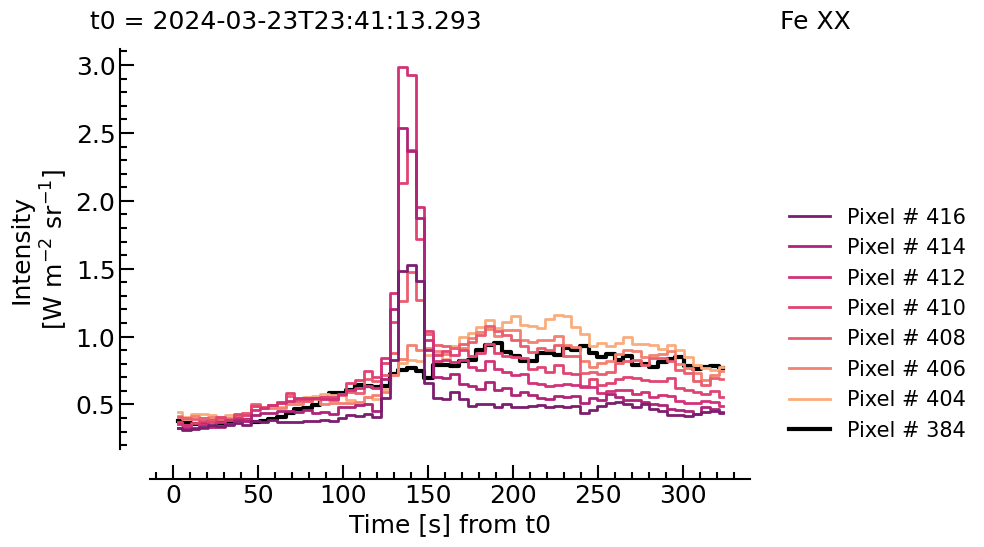

In [90]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_fexx'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_fexx, 
                ndslice_integ_fexx[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_fexx, 
                ndslice_integ_fexx[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_fexx, 
                ndslice_integ_fexx[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_fexx, 
                ndslice_integ_fexx[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_fexx, 
                ndslice_integ_fexx[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_fexx, 
                ndslice_integ_fexx[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_fexx, 
                ndslice_integ_fexx[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_fexx, 
                ndslice_integ_fexx[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )
ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Intensity\n[W m$^{-2}$ sr$^{-1}$]')


ax.text(1.05, 1.05, r'Fe XX', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> - O II

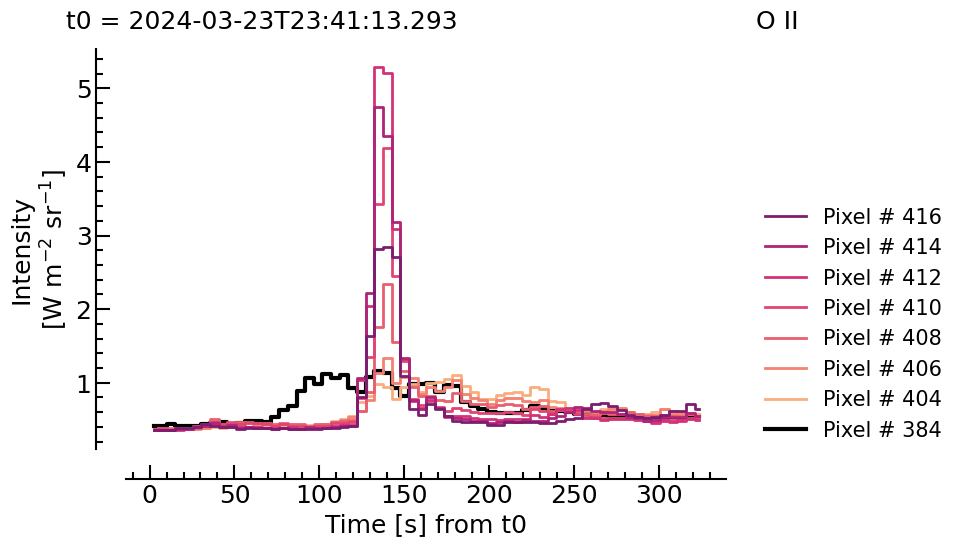

In [92]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_oii'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_fexx, 
                ndslice_integ_oii[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_fexx, 
                ndslice_integ_oii[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_fexx, 
                ndslice_integ_oii[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_fexx, 
                ndslice_integ_oii[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_fexx, 
                ndslice_integ_oii[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_fexx, 
                ndslice_integ_oii[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_fexx, 
                ndslice_integ_oii[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_fexx, 
                ndslice_integ_oii[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )
ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Intensity\n[W m$^{-2}$ sr$^{-1}$]')


ax.text(1.05, 1.05, r'O II', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> - N IV

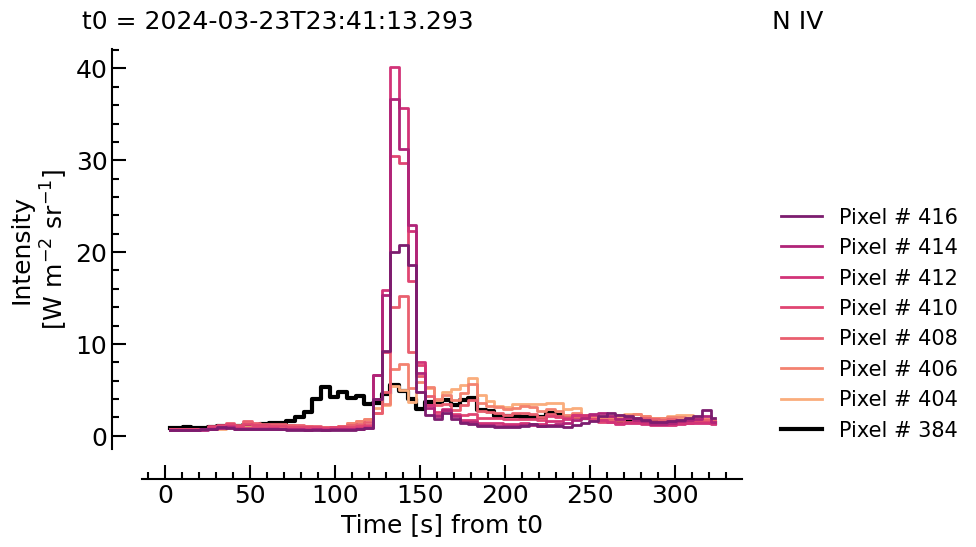

In [93]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_niv'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_niv, 
                ndslice_integ_niv[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_niv, 
                ndslice_integ_niv[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_niv, 
                ndslice_integ_niv[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_niv, 
                ndslice_integ_niv[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_niv, 
                ndslice_integ_niv[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_niv, 
                ndslice_integ_niv[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_niv, 
                ndslice_integ_niv[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_niv, 
                ndslice_integ_niv[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )
ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Intensity\n[W m$^{-2}$ sr$^{-1}$]')


ax.text(1.05, 1.05, r'N IV', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> - Lyg

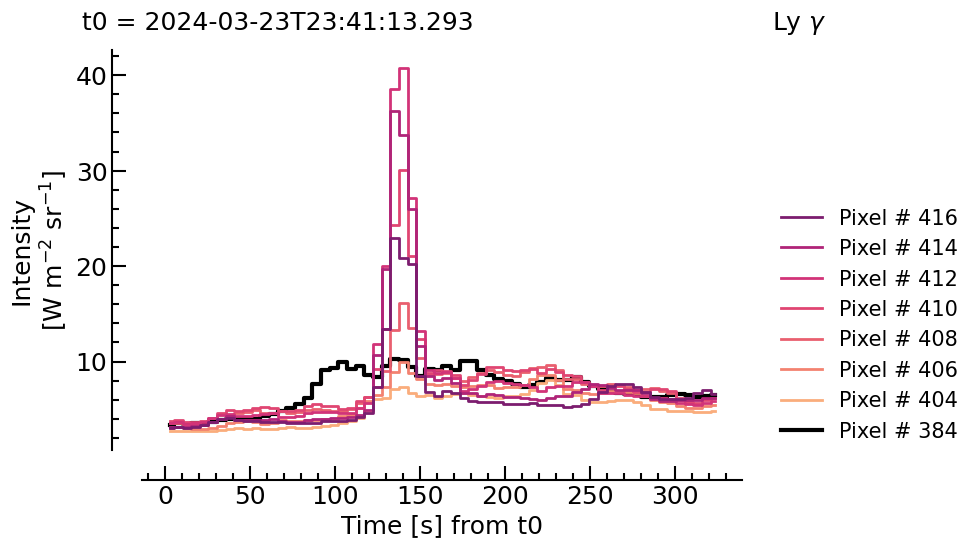

In [94]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_lyg'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_lyg, 
                ndslice_integ_lyg[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_lyg, 
                ndslice_integ_lyg[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_lyg, 
                ndslice_integ_lyg[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_lyg, 
                ndslice_integ_lyg[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_lyg, 
                ndslice_integ_lyg[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_lyg, 
                ndslice_integ_lyg[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_lyg, 
                ndslice_integ_lyg[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_lyg, 
                ndslice_integ_lyg[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )

ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Intensity\n[W m$^{-2}$ sr$^{-1}$]')


ax.text(1.05, 1.05, r'Ly $\gamma$', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> - C III

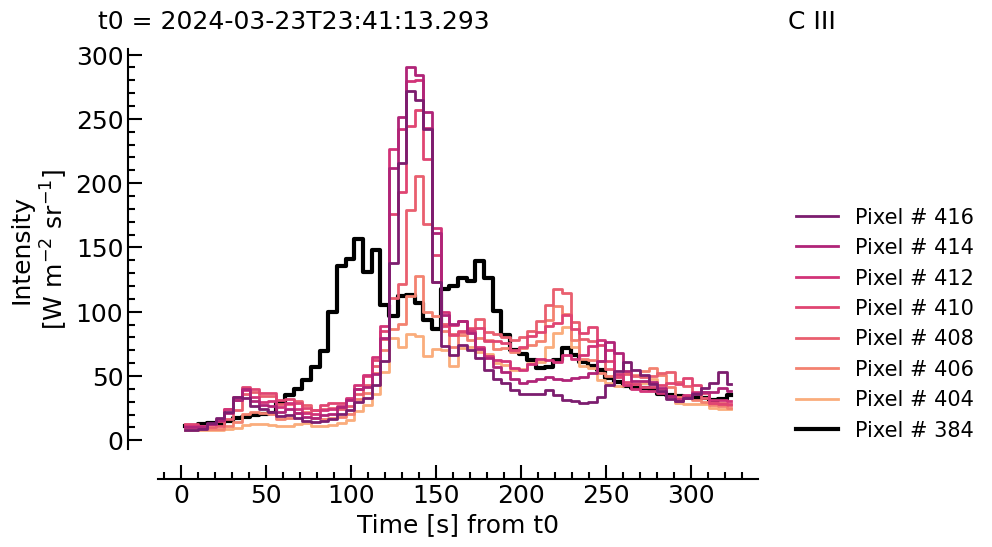

In [95]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_ciii'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_lyg, 
                ndslice_integ_ciii[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_lyg, 
                ndslice_integ_ciii[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_lyg, 
                ndslice_integ_ciii[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_lyg, 
                ndslice_integ_ciii[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_lyg, 
                ndslice_integ_ciii[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_lyg, 
                ndslice_integ_ciii[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_lyg, 
                ndslice_integ_ciii[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_lyg, 
                ndslice_integ_ciii[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )

ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Intensity\n[W m$^{-2}$ sr$^{-1}$]')


ax.text(1.05, 1.05, r'C III', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> - Fe XVIII

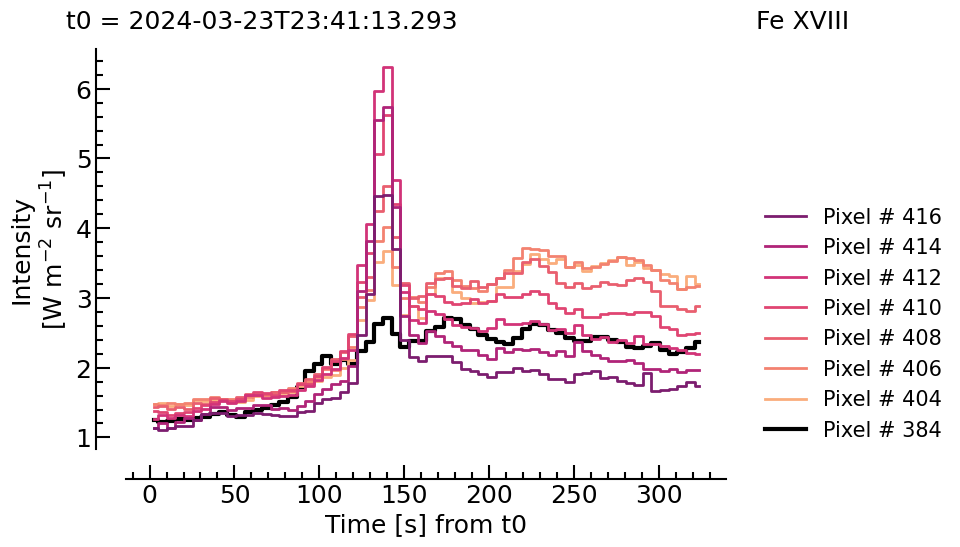

In [96]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_fexviii'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_lyg, 
                ndslice_integ_fexviii[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_lyg, 
                ndslice_integ_fexviii[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_lyg, 
                ndslice_integ_fexviii[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_lyg, 
                ndslice_integ_fexviii[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_lyg, 
                ndslice_integ_fexviii[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_lyg, 
                ndslice_integ_fexviii[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_lyg, 
                ndslice_integ_fexviii[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_lyg, 
                ndslice_integ_fexviii[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )

ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Intensity\n[W m$^{-2}$ sr$^{-1}$]')


ax.text(1.05, 1.05, r'Fe XVIII', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> - S III (1)

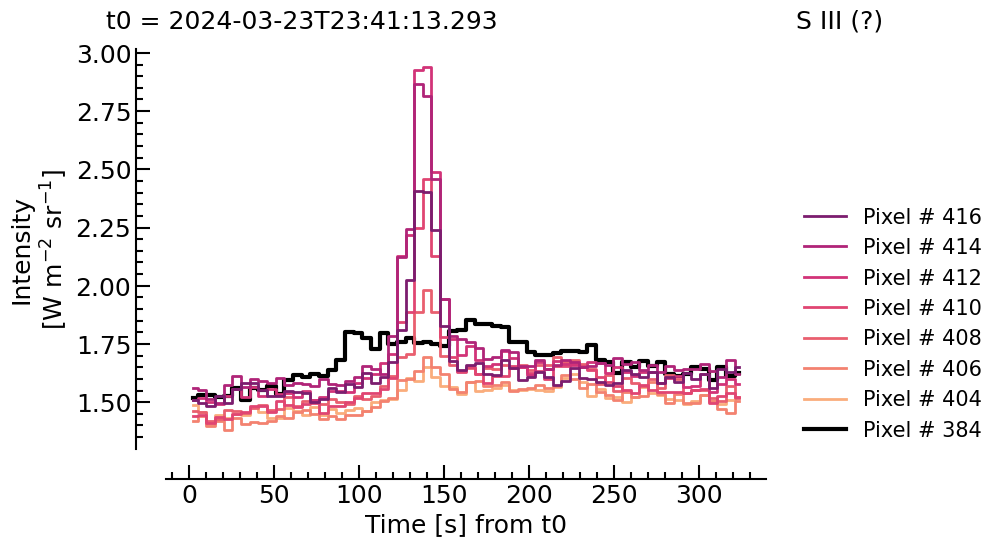

In [97]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_siii_1'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_1[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_1[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_1[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_1[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_1[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_1[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_1[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_1[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )

ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Intensity\n[W m$^{-2}$ sr$^{-1}$]')


ax.text(1.05, 1.05, r'S III (?)', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> - S III (2)

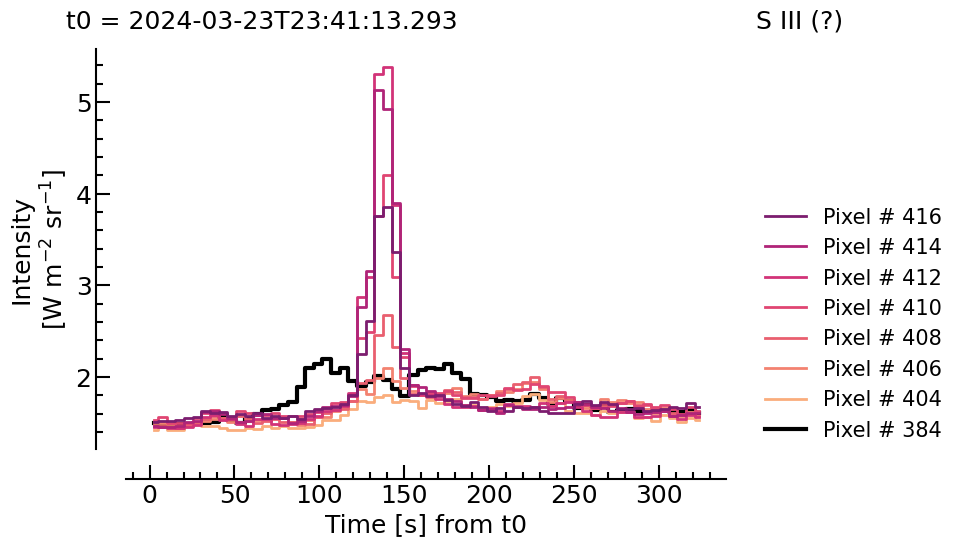

In [98]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_siii_2'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_2[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_2[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_2[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_2[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_2[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_2[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_2[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_lyb_cont, 
                ndslice_integ_siii_2[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )

ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Intensity\n[W m$^{-2}$ sr$^{-1}$]')


ax.text(1.05, 1.05, r'S III (?)', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> - Ly b

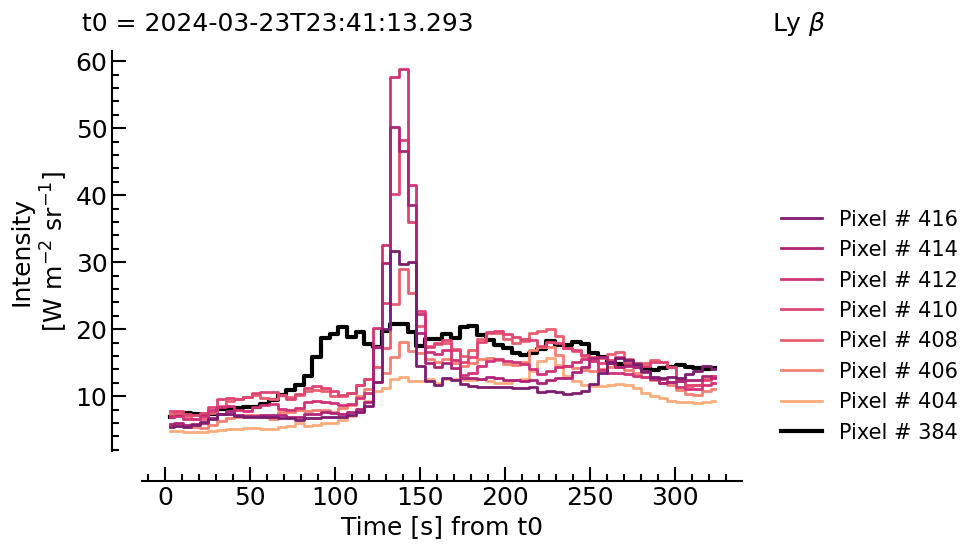

In [99]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_Lyb'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_lyb, 
                ndslice_integ_lyb[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_lyb, 
                ndslice_integ_lyb[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_lyb, 
                ndslice_integ_lyb[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_lyb, 
                ndslice_integ_lyb[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_lyb, 
                ndslice_integ_lyb[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_lyb, 
                ndslice_integ_lyb[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_lyb, 
                ndslice_integ_lyb[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_lyb, 
                ndslice_integ_lyb[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )

ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Intensity\n[W m$^{-2}$ sr$^{-1}$]')


ax.text(1.05, 1.05, r'Ly $\beta$', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> - O VI 1032

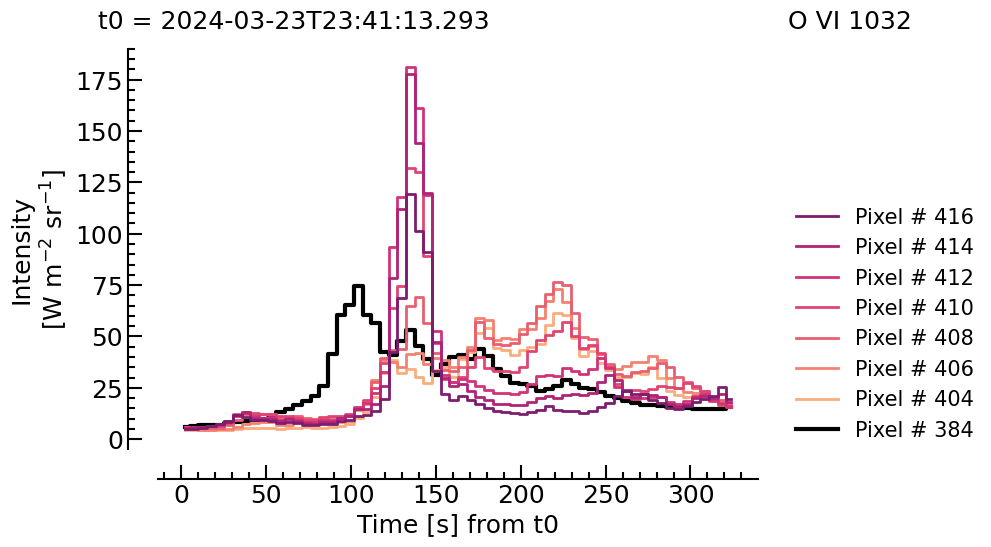

In [100]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_ovi_1032'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )

ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Intensity\n[W m$^{-2}$ sr$^{-1}$]')


ax.text(1.05, 1.05, r'O VI 1032', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> - O VI 1032 continuum

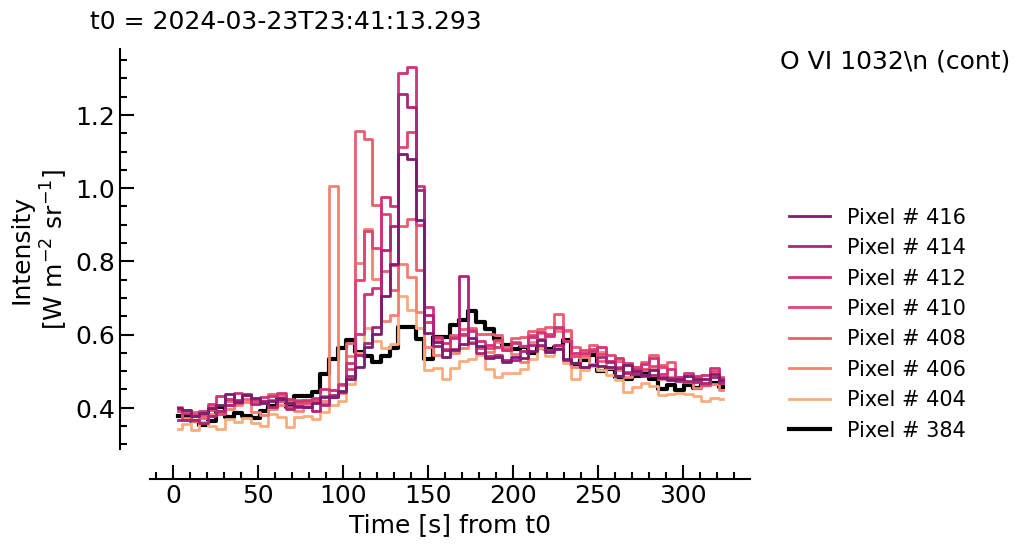

In [101]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_ovi_1032'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032_cont[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032_cont[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032_cont[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032_cont[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032_cont[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032_cont[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032_cont[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032_cont[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )

ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Intensity\n[W m$^{-2}$ sr$^{-1}$]')


ax.text(1.05, 0.95, r'O VI 1032\n (cont)', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> - O VI 1037

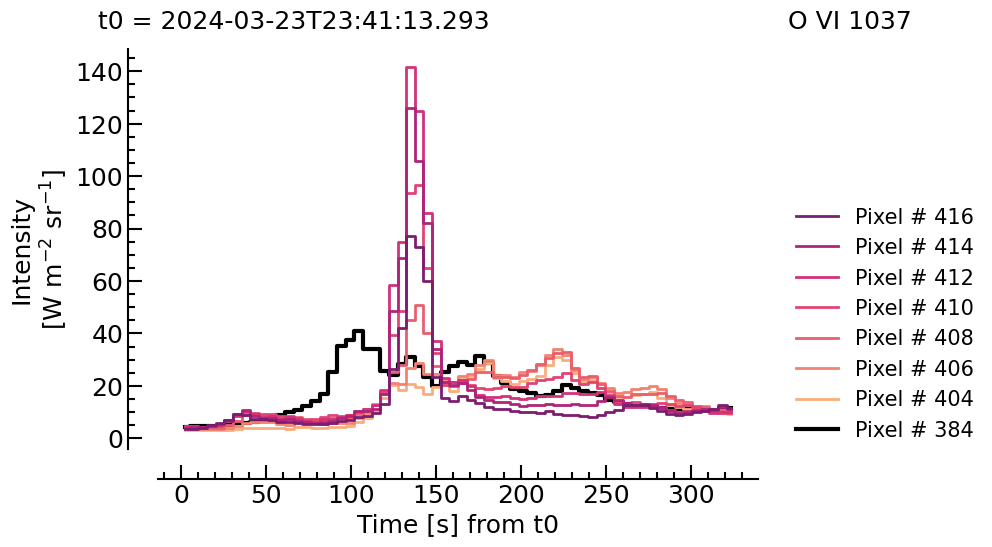

In [102]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_ovi_1037'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_ovi_1037, 
                ndslice_integ_ovi_1037[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_ovi_1037, 
                ndslice_integ_ovi_1037[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_ovi_1037, 
                ndslice_integ_ovi_1037[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_ovi_1037, 
                ndslice_integ_ovi_1037[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_ovi_1037, 
                ndslice_integ_ovi_1037[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_ovi_1037, 
                ndslice_integ_ovi_1037[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_ovi_1037, 
                ndslice_integ_ovi_1037[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_ovi_1037, 
                ndslice_integ_ovi_1037[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )

ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Intensity\n[W m$^{-2}$ sr$^{-1}$]')


ax.text(1.05, 1.05, r'O VI 1037', 
         color = 'black',transform=ax.transAxes) 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

***Ratios of certain lines***

> Lyb / lyg

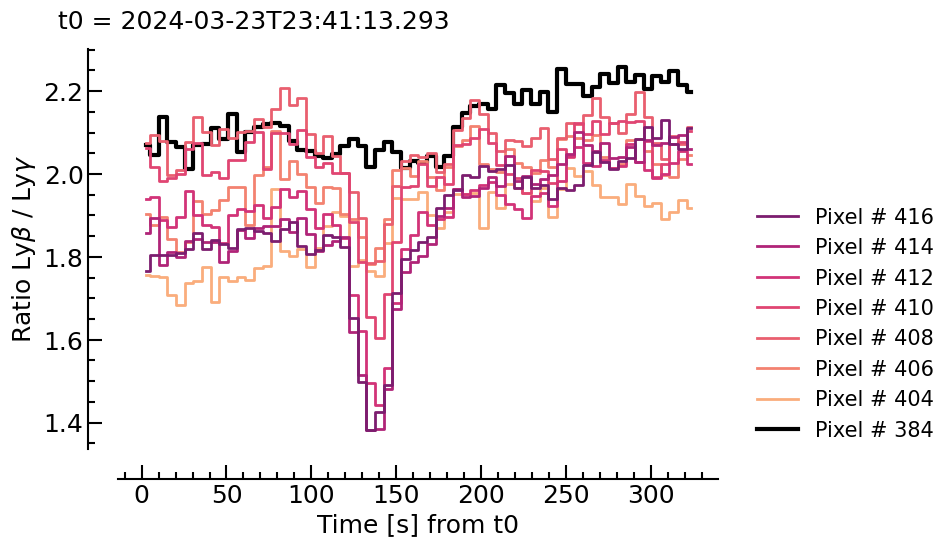

In [111]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_Ratio_lyb_lyg'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_lyg, 
                ndslice_integ_lyb[:,0,pixels2plot[0]].data/ndslice_integ_lyg[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_lyg, 
                ndslice_integ_lyb[:,0,pixels2plot[1]].data/ndslice_integ_lyg[:,0,pixels2plot[1]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_lyg, 
                ndslice_integ_lyb[:,0,pixels2plot[2]].data/ndslice_integ_lyg[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_lyg, 
                ndslice_integ_lyb[:,0,pixels2plot[3]].data/ndslice_integ_lyg[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_lyg, 
                ndslice_integ_lyb[:,0,pixels2plot[4]].data/ndslice_integ_lyg[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_lyg, 
                ndslice_integ_lyb[:,0,pixels2plot[5]].data/ndslice_integ_lyg[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_lyg, 
                ndslice_integ_lyb[:,0,pixels2plot[6]].data/ndslice_integ_lyg[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_lyg, 
                ndslice_integ_lyb[:,0,pixels2plot[7]].data/ndslice_integ_lyg[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )

ax.set_xlabel('Time [s] from t0')
ax.set_ylabel(r'Ratio Ly$\beta$ / Ly$\gamma$')

 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

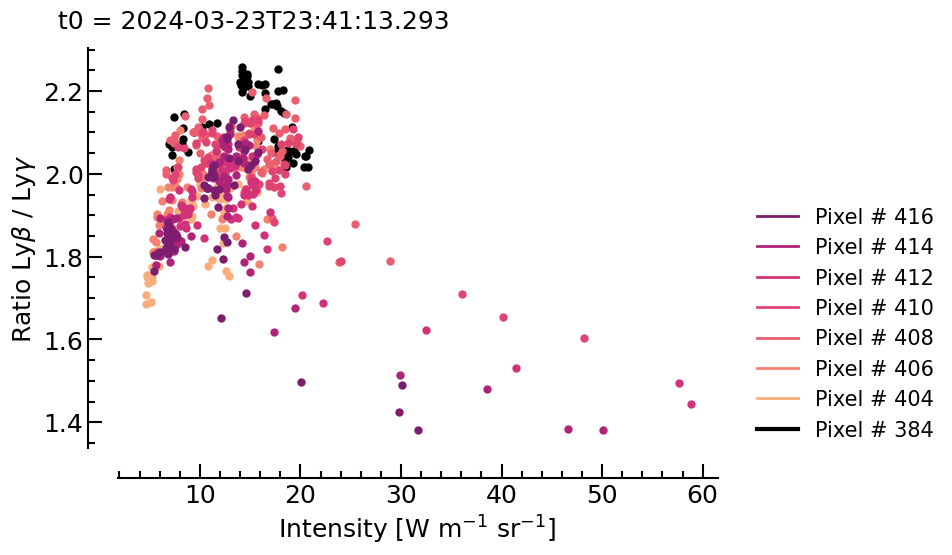

In [113]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_Ratio_lyb_lyg_fnInt'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

ax.scatter(ndslice_integ_lyb[:,0,pixels2plot[0]].data, 
                ndslice_integ_lyb[:,0,pixels2plot[0]].data/ndslice_integ_lyg[:,0,pixels2plot[0]].data, 
                linewidth = 0, 
                marker = 'o',
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
ax.scatter(ndslice_integ_lyb[:,0,pixels2plot[1]].data, 
                ndslice_integ_lyb[:,0,pixels2plot[1]].data/ndslice_integ_lyg[:,0,pixels2plot[1]].data, 
                linewidth = 0, 
                marker = 'o', 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
ax.scatter(ndslice_integ_lyb[:,0,pixels2plot[2]].data, 
                ndslice_integ_lyb[:,0,pixels2plot[2]].data/ndslice_integ_lyg[:,0,pixels2plot[2]].data, 
                linewidth = 0, 
                marker = 'o', 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
ax.scatter(ndslice_integ_lyb[:,0,pixels2plot[3]].data, 
                ndslice_integ_lyb[:,0,pixels2plot[3]].data/ndslice_integ_lyg[:,0,pixels2plot[3]].data, 
                linewidth = 0, 
                marker = 'o',
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
ax.scatter(ndslice_integ_lyb[:,0,pixels2plot[4]].data, 
                ndslice_integ_lyb[:,0,pixels2plot[4]].data/ndslice_integ_lyg[:,0,pixels2plot[4]].data, 
                linewidth = 0, 
                marker = 'o', 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
ax.scatter(ndslice_integ_lyb[:,0,pixels2plot[5]].data, 
                ndslice_integ_lyb[:,0,pixels2plot[5]].data/ndslice_integ_lyg[:,0,pixels2plot[5]].data, 
                linewidth = 0, 
                marker = 'o',
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
ax.scatter(ndslice_integ_lyb[:,0,pixels2plot[6]].data, 
                ndslice_integ_lyb[:,0,pixels2plot[6]].data/ndslice_integ_lyg[:,0,pixels2plot[6]].data, 
                linewidth = 0, 
                marker = 'o', 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
ax.scatter(ndslice_integ_lyb[:,0,pixels2plot[7]].data, 
                ndslice_integ_lyb[:,0,pixels2plot[7]].data/ndslice_integ_lyg[:,0,pixels2plot[7]].data, 
                linewidth = 0, 
                marker = 'o', 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )

ax.set_xlabel('Intensity [W m$^{-1}$ sr$^{-1}$] ')
ax.set_ylabel(r'Ratio Ly$\beta$ / Ly$\gamma$')

 
ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> O VI 1032 / O VI 1037

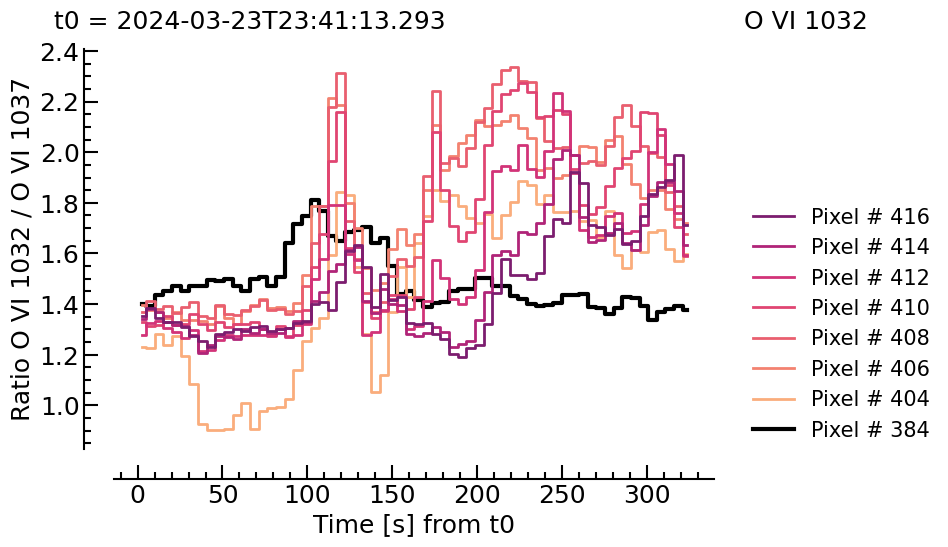

In [105]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_Ratio_ovi1032_ovi1037'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[0]].data/ndslice_integ_ovi_1037[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[1]].data/ndslice_integ_ovi_1037[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[2]].data/ndslice_integ_ovi_1037[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[3]].data/ndslice_integ_ovi_1037[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[4]].data/ndslice_integ_ovi_1037[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[5]].data/ndslice_integ_ovi_1037[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[6]].data/ndslice_integ_ovi_1037[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[7]].data/ndslice_integ_ovi_1037[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )

ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Ratio O VI 1032 / O VI 1037')



ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

> - O VI 1032 / O VI 1032 Cont

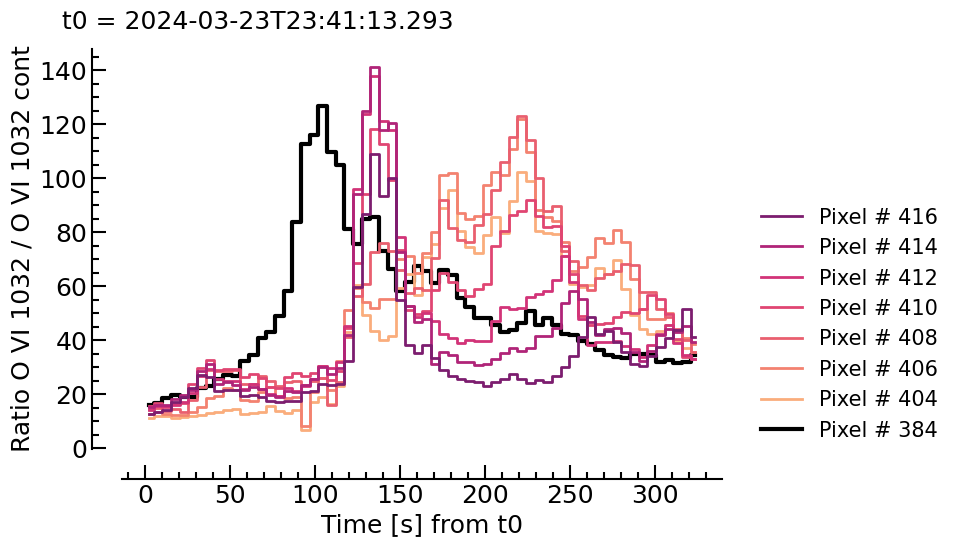

In [106]:
savepng = True
savepdf = False
dirout = '/Volumes/GrahamKerr_work/00_Workbackup/Documents/Research/Python_Programs/SoloSPICE_analysis/00_Figures/'
fname_out = 'SPICE_lightcurves_23rdMarch2024_V02_251658348-013_Ratio_ovi1032_ovi1037'

fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

pixels2plot = np.concatenate([[384],np.arange(404,418,2)])
cmaptemp = pal.cartocolors.sequential.SunsetDark_7.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.0,1.0,len(pixels2plot)))

line1, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[0]].data/ndslice_integ_ovi_1032_cont[:,0,pixels2plot[0]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 3, 
                color = 'black',
                label = 'Pixel # %d' %(pixels2plot[0])
                )
line2, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[1]].data/ndslice_integ_ovi_1032_cont[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[1],
                label = 'Pixel # %d' %(pixels2plot[1])
                )
line3, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[2]].data/ndslice_integ_ovi_1032_cont[:,0,pixels2plot[2]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[2],
                label = 'Pixel # %d' %(pixels2plot[2])
                )
line4, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[3]].data/ndslice_integ_ovi_1032_cont[:,0,pixels2plot[3]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[3],
                label = 'Pixel # %d' %(pixels2plot[3])
                )
line5, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[4]].data/ndslice_integ_ovi_1032_cont[:,0,pixels2plot[4]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[4],
                label = 'Pixel # %d' %(pixels2plot[4])
                )
line6, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[5]].data/ndslice_integ_ovi_1032_cont[:,0,pixels2plot[5]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[5],
                label = 'Pixel # %d' %(pixels2plot[5])
                )
line7, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[6]].data/ndslice_integ_ovi_1032_cont[:,0,pixels2plot[6]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[6],
                label = 'Pixel # %d' %(pixels2plot[6])
                )
line8, = ax.plot(times_ovi_1032, 
                ndslice_integ_ovi_1032[:,0,pixels2plot[7]].data/ndslice_integ_ovi_1032_cont[:,0,pixels2plot[7]].data, 
                linestyle = '-', drawstyle = 'steps-mid',
                linewidth = 2, 
                color = colors[7],
                label = 'Pixel # %d' %(pixels2plot[7])
                )

ax.set_xlabel('Time [s] from t0')
ax.set_ylabel('Ratio O VI 1032 / O VI 1032 cont')



ax.text(-0.1, 1.05, 't0 = '+t0, 
         color = 'black',transform=ax.transAxes, fontsize = 18) 
ax.spines["bottom"].set_position(("axes",-.075))
ax.spines["left"].set_position(("axes",-.05))

leg1 = ax.legend(handles=[line8,line7,line6,line5,line4,line3,line2,line1],loc=(1.05,0), fontsize = 15)

if savepng == True:
    plt.savefig(dirout+fname_out+'.png',format='png', bbox_inches = 'tight', dpi=300)
if savepdf == True:
    plt.savefig(dirout+fname_out+'.pdf',format='pdf', bbox_inches = 'tight', dpi=300)


plt.show()

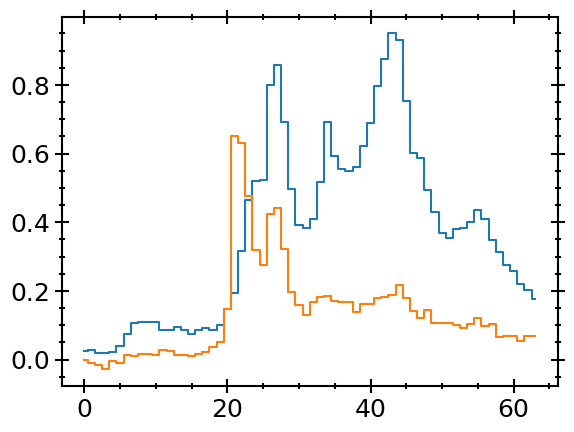

In [52]:
plt.plot(ndslice_integ_ovi_1032.data[:,0,int(pixels_ex[1][0])]/np.nanmax(ndslice_integ_ovi_1032.data[:,0,int(pixels_ex[1][0])])-0.05, 
         drawstyle = 'steps-mid')
plt.plot(ndslice_integ_ovi_1032_cont.data[:,0,int(pixels_ex[1][0])]/np.nanmax(ndslice_integ_ovi_1032_cont.data[:,0,int(pixels_ex[1][0])])-0.35,
         drawstyle = 'steps-mid')

(90.0, 150.0)

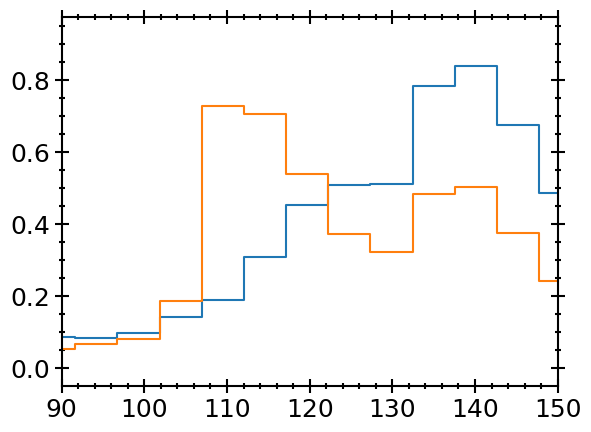

In [53]:
plt.plot(times_oiii,ndslice_integ_ovi_1032.data[:,0,408]/np.nanmax(ndslice_integ_ovi_1032.data[:,0,407])-0.05, 
         drawstyle = 'steps-mid')
plt.plot(times_oiii,ndslice_integ_ovi_1032_cont.data[:,0,408]/np.nanmax(ndslice_integ_ovi_1032_cont.data[:,0,407])-0.35,
         drawstyle = 'steps-mid')
plt.xlim(90,150)

In [54]:
tind = 26
times_oiii[tind]


<Quantity 135.00026 s>

In [55]:
wavels_mast = np.concatenate([wavels_lyb_cont, wavels_lyb, wavels_ovi_1032, wavels_ovi_1037])

In [56]:
data_mast = np.concatenate([window_lyb_cont.data[:,:,:,0],
                            window_lyb.data[:,:,:,0],
                            window_ovi_1032.data[:,:,:,0],
                            window_ovi_1037.data[:,:,:,0]], axis=1)

In [57]:
wavels_mast.shape

(109,)

(10.0, 30.0)

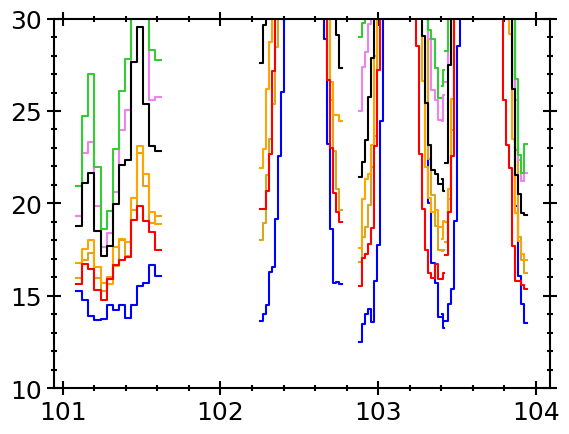

In [58]:
# plt.plot(wavels_mast, data_mast[20,:,408], color = 'black', drawstyle = 'steps-mid')
# plt.plot(wavels_mast, data_mast[21,:,408], color = 'tomato', drawstyle = 'steps-mid')
# plt.plot(wavels_mast, data_mast[22,:,408], color = 'green', drawstyle = 'steps-mid')
plt.plot(wavels_mast, data_mast[23,:,410], color = 'blue', drawstyle = 'steps-mid')
plt.plot(wavels_mast, data_mast[24,:,410], color = 'goldenrod', drawstyle = 'steps-mid')
plt.plot(wavels_mast, data_mast[25,:,410], color = 'orange', drawstyle = 'steps-mid')
plt.plot(wavels_mast, data_mast[26,:,410], color = 'violet', drawstyle = 'steps-mid')
plt.plot(wavels_mast, data_mast[27,:,410], color = 'limegreen', drawstyle = 'steps-mid')
plt.plot(wavels_mast, data_mast[28,:,410], color = 'black', drawstyle = 'steps-mid')
plt.plot(wavels_mast, data_mast[29,:,410], color = 'red', drawstyle = 'steps-mid')

plt.ylim(10, 30)
# plt.yscale('log')

In [ ]:
times_lyb[26]